<p style="font-size:36px;text-align:center"> <b>Personalized cancer diagnosis</b> </p>

<h1>1. Business Problem</h1>

<h2>1.1. Description</h2>

<p> Source: https://www.kaggle.com/c/msk-redefining-cancer-treatment/ </p>
<p> Data: Memorial Sloan Kettering Cancer Center (MSKCC)</p>
<p> Download training_variants.zip and training_text.zip from Kaggle.</p> 

<h6> Context:</h6>
<p> Source: https://www.kaggle.com/c/msk-redefining-cancer-treatment/discussion/35336#198462</p>

<h6> Problem statement : </h6>
<p> Classify the given genetic variations/mutations based on evidence from text-based clinical literature. </p>

<h2>1.2. Source/Useful Links</h2>

 Some articles and reference blogs about the problem statement
    
1. https://www.forbes.com/sites/matthewherper/2017/06/03/a-new-cancer-drug-helped-almost-everyone-who-took-it-almost-heres-what-it-teaches-us/#2a44ee2f6b25
2. https://www.youtube.com/watch?v=UwbuW7oK8rk 
3. https://www.youtube.com/watch?v=qxXRKVompI8
    
<h2>1.3. Real-world/Business objectives and constraints.</h2>

* No low-latency requirement.
* Interpretability is important.
* Errors can be very costly.
* Probability of a data-point belonging to each class is needed.

<h1>2. Machine Learning Problem Formulation</h1>

<h2>2.1. Data</h2>

<h3>2.1.1. Data Overview</h3>

- Source: https://www.kaggle.com/c/msk-redefining-cancer-treatment/data
- We have two data files: one conatins the information about the genetic mutations and the other contains the clinical evidence (text) that  human experts/pathologists use to classify the genetic mutations. 
- Both these data files are have a common column called ID
- <p> 
    Data file's information:
    <ul> 
        <li>
        training_variants (ID , Gene, Variations, Class)
        </li>
        <li>
        training_text (ID, Text)
        </li>
    </ul>
</p>

<h3>2.1.2. Example Data Point</h3>

<h6>training_variants</h6>
<hr>
ID,Gene,Variation,Class<br>
0,FAM58A,Truncating Mutations,1 <br>
1,CBL,W802*,2 <br>
2,CBL,Q249E,2 <br>
...

<h6> training_text</h6>
<hr>
ID,Text <br>
0||Cyclin-dependent kinases (CDKs) regulate a variety of fundamental cellular processes. CDK10 stands out as one of the last orphan CDKs for which no activating cyclin has been identified and no kinase activity revealed. Previous work has shown that CDK10 silencing increases ETS2 (v-ets erythroblastosis virus E26 oncogene homolog 2)-driven activation of the MAPK pathway, which confers tamoxifen resistance to breast cancer cells. The precise mechanisms by which CDK10 modulates ETS2 activity, and more generally the functions of CDK10, remain elusive. Here we demonstrate that CDK10 is a cyclin-dependent kinase by identifying cyclin M as an activating cyclin. Cyclin M, an orphan cyclin, is the product of FAM58A, whose mutations cause STAR syndrome, a human developmental anomaly whose features include toe syndactyly, telecanthus, and anogenital and renal malformations. We show that STAR syndrome-associated cyclin M mutants are unable to interact with CDK10. Cyclin M silencing phenocopies CDK10 silencing in increasing c-Raf and in conferring tamoxifen resistance to breast cancer cells. CDK10/cyclin M phosphorylates ETS2 in vitro, and in cells it positively controls ETS2 degradation by the proteasome. ETS2 protein levels are increased in cells derived from a STAR patient, and this increase is attributable to decreased cyclin M levels. Altogether, our results reveal an additional regulatory mechanism for ETS2, which plays key roles in cancer and development. They also shed light on the molecular mechanisms underlying STAR syndrome.Cyclin-dependent kinases (CDKs) play a pivotal role in the control of a number of fundamental cellular processes (1). The human genome contains 21 genes encoding proteins that can be considered as members of the CDK family owing to their sequence similarity with bona fide CDKs, those known to be activated by cyclins (2). Although discovered almost 20 y ago (3, 4), CDK10 remains one of the two CDKs without an identified cyclin partner. This knowledge gap has largely impeded the exploration of its biological functions. CDK10 can act as a positive cell cycle regulator in some cells (5, 6) or as a tumor suppressor in others (7, 8). CDK10 interacts with the ETS2 (v-ets erythroblastosis virus E26 oncogene homolog 2) transcription factor and inhibits its transcriptional activity through an unknown mechanism (9). CDK10 knockdown derepresses ETS2, which increases the expression of the c-Raf protein kinase, activates the MAPK pathway, and induces resistance of MCF7 cells to tamoxifen (6). ... 

<h2>2.2. Mapping the real-world problem to an ML problem</h2>

<h3>2.2.1. Type of Machine Learning Problem</h3>

<p>
    
    There are nine different classes a genetic mutation can be classified into => Multi class classification problem    
    
</p>

<h3>2.2.2. Performance Metric</h3>

Source: https://www.kaggle.com/c/msk-redefining-cancer-treatment#evaluation

Metric(s): 
* Multi class log-loss 
* Confusion matrix 

<h3>2.2.3. Machine Learing Objectives and Constraints</h3>

<p> Objective: Predict the probability of each data-point belonging to each of the nine classes.
</p>
<p> Constraints:
</p>
* Interpretability
* Class probabilities are needed.
* Penalize the errors in class probabilites => Metric is Log-loss.
* No Latency constraints.

<h2>2.3. Train, CV and Test Datasets</h2>

 Split the dataset randomly into three parts train, cross validation and test with 64%,16%, 20% of data respectively
    
<h1>3. Exploratory Data Analysis</h1>

In [1]:
# Importing necessary Libraries
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import pickle
import os
import math
import sqlite3
import string
import itertools
from collections import Counter, defaultdict, OrderedDict
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from mpl_toolkits.mplot3d import Axes3D
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import contractions

from sklearn.decomposition import TruncatedSVD
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics.classification import accuracy_score, log_loss
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC 
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn import model_selection
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc, roc_auc_score, normalized_mutual_info_score
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.ensemble import RandomForestClassifier,VotingClassifier

from scipy.sparse import hstack
from mlxtend.classifier import StackingClassifier
from imblearn.over_sampling import SMOTE

from tqdm import tqdm
from prettytable import PrettyTable

Using TensorFlow backend.


<h2>3.1. Reading Data</h2>

<h3>3.1.1. Reading Gene and Variation Data</h3>

In [2]:
df_1 = pd.read_csv(r'training_variants')
print(df_1.shape)
df_1.head()

(3321, 4)


,ID,Gene,Variation,Class
0,0,FAM58A,Truncating Mutations,1
1,1,CBL,W802*,2
2,2,CBL,Q249E,2
3,3,CBL,N454D,3
4,4,CBL,L399V,4


<p>
    training/training_variants is a comma separated file containing the description of the genetic mutations used for training. <br>
    Fields are 
    <ul>
        <li><b>ID : </b>the id of the row used to link the mutation to the clinical evidence</li>
        <li><b>Gene : </b>the gene where this genetic mutation is located </li>
        <li><b>Variation : </b>the aminoacid change for this mutations </li>
        <li><b>Class :</b> 1-9 the class this genetic mutation has been classified on</li>
    </ul>
    
<h3>3.1.2. Reading Text Data</h3>

In [3]:
df_2 = pd.read_csv(r'training_text', sep= '\|\|', names= ['ID', 'Text'], skiprows= 1) # check the seperator already given in sample text in 2.1.2
print(df_2.shape)
df_2.head()

(3321, 2)


,ID,Text
0,0,Cyclin-dependent kinases (CDKs) regulate a var...
1,1,Abstract Background Non-small cell lung canc...
2,2,Abstract Background Non-small cell lung canc...
3,3,Recent evidence has demonstrated that acquired...
4,4,Oncogenic mutations in the monomeric Casitas B...


In [4]:
df_2[df_2['Text'].isnull()]

,ID,Text
1109,1109,NaN
1277,1277,NaN
1407,1407,NaN
1639,1639,NaN
2755,2755,NaN


In [5]:
df_2.dropna(inplace = True)

In [6]:
df_2[df_2['Text'].isnull()]

,ID,Text


<h3>3.1.3. Preprocessing of text</h3>

In [7]:
df_2['Text'][0]

"Cyclin-dependent kinases (CDKs) regulate a variety of fundamental cellular processes. CDK10 stands out as one of the last orphan CDKs for which no activating cyclin has been identified and no kinase activity revealed. Previous work has shown that CDK10 silencing increases ETS2 (v-ets erythroblastosis virus E26 oncogene homolog 2)-driven activation of the MAPK pathway, which confers tamoxifen resistance to breast cancer cells. The precise mechanisms by which CDK10 modulates ETS2 activity, and more generally the functions of CDK10, remain elusive. Here we demonstrate that CDK10 is a cyclin-dependent kinase by identifying cyclin M as an activating cyclin. Cyclin M, an orphan cyclin, is the product of FAM58A, whose mutations cause STAR syndrome, a human developmental anomaly whose features include toe syndactyly, telecanthus, and anogenital and renal malformations. We show that STAR syndrome-associated cyclin M mutants are unable to interact with CDK10. Cyclin M silencing phenocopies CDK1

In [8]:
item = ['fig', 'pptfig' ,'kb', 'mm'] # After some observation of data

def clean_sentence(text):
    text = text.lower() # converts text to lower case
    text = contractions.fix(text) # converts (don't) to (do not)
    text = re.sub('\W+',' ',text) # removes all special chars, punc
    text = ''.join([i for i in text if not i.isdigit()]) # removes numbers
    for i in item:
        text = text.replace(i, '')
    text = text.split()
    text1 = []
    for i in text:
        if "_" in i:
            del i # removes string if it contains '_'
        else:
            text1.append(i)
    text = " ".join(text1)
    text = ' '.join([i for i in text.split() if len(i)>1]) # https://stackoverflow.com/a/32705991/10219869
    return text

In [9]:
df_2['TEXT'] = [clean_sentence(i) for i in df_2['Text']]

In [10]:
df_2['TEXT'][0]

'cyclin dependent kinases cdks regulate variety of fundamental cellular processes cdk stands out as one of the last orphan cdks for which no activating cyclin has been identified and no kinase activity revealed previous work has shown that cdk silencing increases ets ets erythroblastosis virus oncogene homolog driven activation of the mapk pathway which confers tamoxifen resistance to breast cancer cells the precise mechanisms by which cdk modulates ets activity and more generally the functions of cdk remain elusive here we demonstrate that cdk is cyclin dependent kinase by identifying cyclin as an activating cyclin cyclin an orphan cyclin is the product of fama whose mutations because star syndrome human developmental anomaly whose features include toe syndactyly telecanthus and anogenital and renal malformations we show that star syndrome associated cyclin mutants are unable to interact with cdk cyclin silencing phenocopies cdk silencing in increasing raf and in conferring tamoxifen 

In [11]:
a = df_2['Text'][0].split()
print('No. of words before preprocessing:', len(a))

No. of words before preprocessing: 6089


In [12]:
b = df_2['TEXT'][0].split()
print('No. of words before preprocessing:', len(b))

No. of words before preprocessing: 5541


In [13]:
# merging both the dataframes based on 'ID'
df = pd.merge(left = df_1, right = df_2, on = 'ID')

df = df.drop('Text', axis=1)
df.head()

,ID,Gene,Variation,Class,TEXT
0,0,FAM58A,Truncating Mutations,1,cyclin dependent kinases cdks regulate variety...
1,1,CBL,W802*,2,abstract background non small cell lung cancer...
2,2,CBL,Q249E,2,abstract background non small cell lung cancer...
3,3,CBL,N454D,3,recent evidence has demonstrated that acquired...
4,4,CBL,L399V,4,oncogenic mutations in the monomeric casitas l...


In [14]:
df[df.isnull()].count()

ID           0
Gene         0
Variation    0
Class        0
TEXT         0
dtype: int64

In [15]:
df.shape

(3316, 5)

In [16]:
df['Variation'] = df['Variation'].str.replace('*', '')

In [17]:
df['Variation'].head()

0    Truncating Mutations
1                    W802
2                   Q249E
3                   N454D
4                   L399V
Name: Variation, dtype: object

<h3>3.1.4. Test, Train and Cross Validation Split</h3>

<h4>3.1.4.1. Splitting data into train, test and cross validation (64:20:16)</h4>

In [18]:
x = df
y = df['Class']

# split the data into test and train by maintaining same distribution of output varaible 'y_true' [stratify=y_true]
x1, x_test, y1, y_test = train_test_split(x, y, test_size = 0.2, stratify = y)
x_train, x_cv, y_train, y_cv = train_test_split(x1, y1, test_size = 0.2, stratify = y1)

In [19]:
print('Datapoints in train dataset', x_train.shape[0])
print('Datapoints in cv dataset', x_cv.shape[0])
print('Datapoints in test dataset', x_test.shape[0])

Datapoints in train dataset 2121
Datapoints in cv dataset 531
Datapoints in test dataset 664


In [20]:
# We provide the class label 'y' and the function returns the number of individual class labels along with their percentages

def bar_plot(y): # y = y_train, y_cv, y_test
    yplot = Counter(y) 
    key = yplot.keys()

    key = list(key)
    keys=[]
    for i in key:
        j = str(i)
        keys.append(j)
        
    value = yplot.values()
    value = list(value)
    y = str()

    # https://python-graph-gallery.com/3-control-color-of-barplots/
    plt.bar(x = np.arange(len(key)), height = value, edgecolor = 'black', 
        color=['red', 'blue', 'yellow', 'orange', 'green', 'purple', 'brown', 'black', 'pink'])
    plt.xticks(np.arange(len(key)), keys)
    plt.xlabel('Class')
    plt.ylabel('No. of datapoints')
    plt.title('Distribution of Class Labels')
    plt.grid(b = True)
    plt.show()

    #https://stackoverflow.com/a/33216978/10219869
    ypts = OrderedDict(yplot.most_common())

    # https://stackoverflow.com/a/15785761/10219869
    for i, j in ypts.items():
        k = j/sum(ypts.values())
        print('The number of datapoints in Class {} : {} ({:.2f}%)'.format(i, j, k*100))

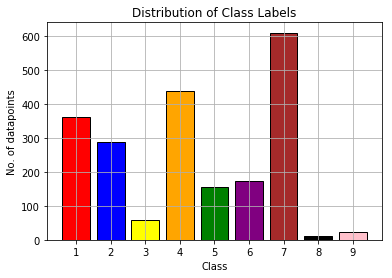

The number of datapoints in Class 7 : 609 (28.71%)
The number of datapoints in Class 4 : 439 (20.70%)
The number of datapoints in Class 1 : 362 (17.07%)
The number of datapoints in Class 2 : 289 (13.63%)
The number of datapoints in Class 6 : 174 (8.20%)
The number of datapoints in Class 5 : 155 (7.31%)
The number of datapoints in Class 3 : 57 (2.69%)
The number of datapoints in Class 9 : 24 (1.13%)
The number of datapoints in Class 8 : 12 (0.57%)


In [21]:
# Train 
bar_plot(y_train)

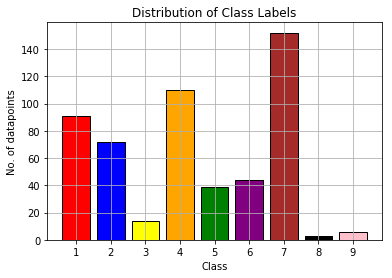

The number of datapoints in Class 7 : 152 (28.63%)
The number of datapoints in Class 4 : 110 (20.72%)
The number of datapoints in Class 1 : 91 (17.14%)
The number of datapoints in Class 2 : 72 (13.56%)
The number of datapoints in Class 6 : 44 (8.29%)
The number of datapoints in Class 5 : 39 (7.34%)
The number of datapoints in Class 3 : 14 (2.64%)
The number of datapoints in Class 9 : 6 (1.13%)
The number of datapoints in Class 8 : 3 (0.56%)


In [22]:
# CV
bar_plot(y_cv)

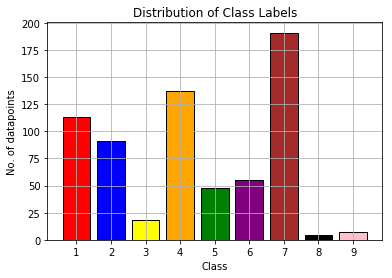

The number of datapoints in Class 7 : 191 (28.77%)
The number of datapoints in Class 4 : 137 (20.63%)
The number of datapoints in Class 1 : 113 (17.02%)
The number of datapoints in Class 2 : 91 (13.70%)
The number of datapoints in Class 6 : 55 (8.28%)
The number of datapoints in Class 5 : 48 (7.23%)
The number of datapoints in Class 3 : 18 (2.71%)
The number of datapoints in Class 9 : 7 (1.05%)
The number of datapoints in Class 8 : 4 (0.60%)


In [23]:
# Test
bar_plot(y_test)

<h2>3.2 Prediction using a 'Random' Model</h2>

<p style="font-size:16px"> In a 'Random' Model, we generate the NINE class probabilites randomly such that they sum to 1. </p>

In [24]:
# we need to generate 9 numbers and the sum of numbers should be 1
# one solution is to genarate 9 numbers and divide each of the numbers by their sum
# ref: https://stackoverflow.com/a/18662466/4084039
# we create a output array that has exactly same size as the CV data

# CV
cv_pred = np.zeros((y_cv.shape[0], 9)) # initialization
for i in range(y_cv.shape[0]):         # no. of datapoints in cv
    rand_probs = np.random.rand(1,9)
    # random 'prediction' without using 'CLASSIFIER/ALGORITHM' and adding values to cv_pred
    cv_pred[i] = (rand_probs / sum(sum(rand_probs)))[0] 
print('Log Loss on CV using Random Model:', log_loss(y_cv, cv_pred, eps = 1e-15))

# Test
test_pred = np.zeros((y_test.shape[0], 9)) # initialization
for i in range(y_test.shape[0]):           # no. of datapoints in test
    rand_probs = np.random.rand(1,9)
    # random 'prediction' without using 'CLASSIFIER/ALGORITHM' and adding values to cv_pred
    test_pred[i] = (rand_probs / sum(sum(rand_probs)))[0] 
print('Log Loss on TEST using Random Model:', log_loss(y_test, test_pred, eps = 1e-15))

Log Loss on CV using Random Model: 2.5104090524768936
Log Loss on TEST using Random Model: 2.4735151649898794


In [25]:
pred_y = np.argmax(test_pred, axis=1)
c_m = confusion_matrix(y_test, pred_y)
c_m = c_m[1:,:-1]

In [103]:
# We write a function for heatmap

def heatmap(cm):
    plt.figure(figsize = (15, 12))
    labels = [1,2,3,4,5,6,7,8,9]
    sns.heatmap(cm, annot = True, xticklabels = labels, yticklabels = labels)
    plt.show()

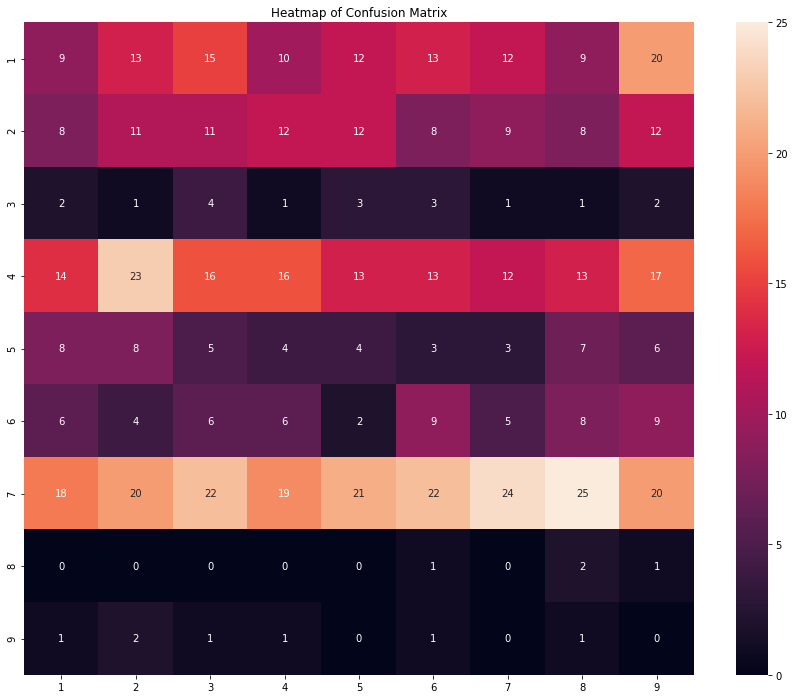

In [27]:
# Confusion Matrix
heatmap(c_m)

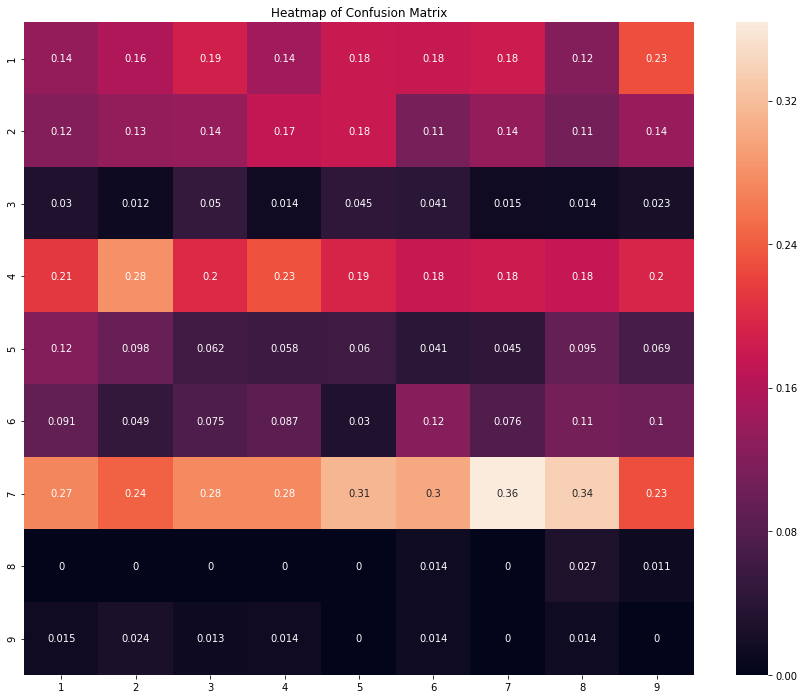

In [28]:
# Precision
precision = c_m / c_m.sum(axis=0)
heatmap(precision)

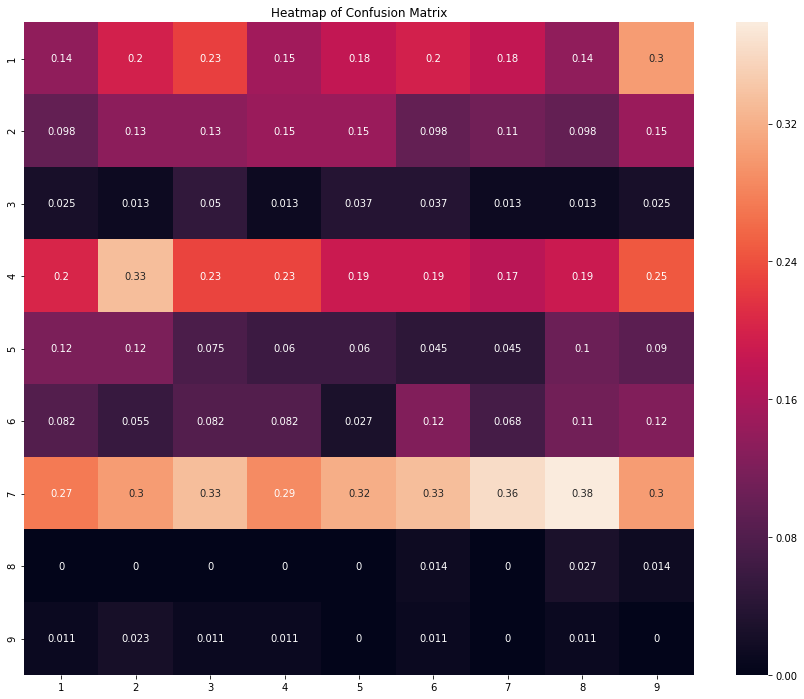

In [29]:
# Recall
recall = (c_m.T / c_m.sum(axis=0)).T
heatmap(recall)

<h3>3.2.1 Univariate Analysis on Gene Feature</h3>

<p style="font-size:18px;"> <b>Q1.</b> Gene, What type of feature it is ?</p>
<p style="font-size:16px;"><b>Ans.</b> Gene is a categorical variable </p>

In [30]:
x_train['Gene'].value_counts()

BRCA1     171
TP53      100
EGFR       98
PTEN       84
BRCA2      80
         ... 
GNA11       1
PTCH1       1
INPP4B      1
MDM4        1
ACVR1       1
Name: Gene, Length: 229, dtype: int64

<p style="font-size:18px;"> <b>Q2.</b> How many categories are there and How they are distributed?</p>

Ans: There are 229 different categories of genes in the train data,and they are distributed as follows:


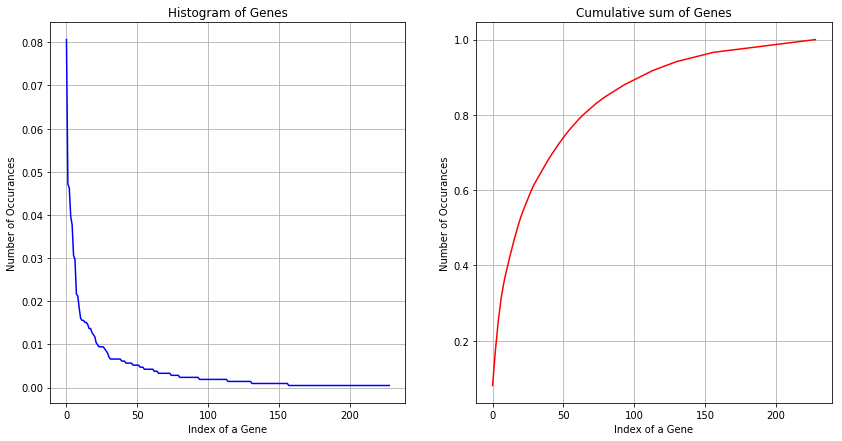

In [31]:
print("Ans: There are", len(x_train['Gene'].value_counts()) ,"different categories of genes in the train data,"
      "and they are distributed as follows:")
Genes = (x_train['Gene'].value_counts()).values / sum((x_train['Gene'].value_counts()).values)
cumsum_genes = np.cumsum(Genes)

# adding plots side by side
# https://towardsdatascience.com/subplots-in-matplotlib-a-guide-and-tool-for-planning-your-plots-7d63fa632857
fig = plt.figure(figsize = (14, 7)) 
fig.add_subplot(1, 2, 1) # 1 row 2 columns 1st plot
plt.plot(Genes, 'b')
plt.xlabel('Index of a Gene')
plt.ylabel('Number of Occurances')
plt.title('Histogram of Genes')
plt.grid()

fig.add_subplot(1, 2, 2) # 1 row 2 columns 1st plot
plt.plot(cumsum_genes, 'r')
plt.xlabel('Index of a Gene')
plt.ylabel('Number of Occurances')
plt.title('Cumulative sum of Genes')
plt.grid()
plt.show()

<p style="font-size:18px;"> <b>Q3.</b> How to featurize this Gene feature ?</p>

<p style="font-size:16px;"><b>Ans.</b>there are two ways we can featurize this variable
check out this video: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/
<ol><li>One hot Encoding</li><li>Response coding</li></ol></p>
<p> We will choose the appropriate featurization based on the ML model we use.  For this problem of multi-class classification with categorical features, one-hot encoding is better for Logistic regression while response coding is better for Random Forests. </p>

In [32]:
# code for response coding with Laplace smoothing.
# alpha : used for laplace smoothing
# feature: ['gene', 'variation']
# df: ['train_df', 'test_df', 'cv_df']
# algorithm
# ----------
# Consider all unique values and the number of occurances of given feature in train data dataframe
# build a vector (1*9) , the first element = (number of times it occured in class1 + 10*alpha / number of time it occurred in total data+90*alpha)
# gv_dict is like a look up table, for every gene it store a (1*9) representation of it
# for a value of feature in df:
# if it is in train data:
# we add the vector that was stored in 'gv_dict' look up table to 'gv_fea'
# if it is not there is train:
# we add [1/9, 1/9, 1/9, 1/9,1/9, 1/9, 1/9, 1/9, 1/9] to 'gv_fea'
# return 'gv_fea'
# ----------------------

# get_gv_fea_dict: Get Gene varaition Feature Dict
def get_gv_fea_dict(alpha, feature, df):
    # value_count: it contains a dict like
    # print(train_df['Gene'].value_counts())
    # output:
    #        {BRCA1      174
    #         TP53       106
    #         EGFR        86
    #         BRCA2       75
    #         PTEN        69
    #         KIT         61
    #         BRAF        60
    #         ERBB2       47
    #         PDGFRA      46
    #         ...}
    # print(train_df['Variation'].value_counts())
    # output:
    # {
    # Truncating_Mutations                     63
    # Deletion                                 43
    # Amplification                            43
    # Fusions                                  22
    # Overexpression                            3
    # E17K                                      3
    # Q61L                                      3
    # S222D                                     2
    # P130S                                     2
    # ...
    # }
    value_count = x_train[feature].value_counts()
    
    # gv_dict : Gene Variation Dict, which contains the probability array for each gene/variation
    gv_dict = dict()
    
    # denominator will contain the number of time that particular feature occured in whole data
    for i, denominator in value_count.items():
        # vec will contain (p(yi==1/Gi) probability of gene/variation belongs to perticular class
        # vec is 9 diamensional vector
        vec = []
        for k in range(1,10):
            # print(train_df.loc[(train_df['Class']==1) & (train_df['Gene']=='BRCA1')])
            #         ID   Gene             Variation  Class  
            # 2470  2470  BRCA1                S1715C      1   
            # 2486  2486  BRCA1                S1841R      1   
            # 2614  2614  BRCA1                   M1R      1   
            # 2432  2432  BRCA1                L1657P      1   
            # 2567  2567  BRCA1                T1685A      1   
            # 2583  2583  BRCA1                E1660G      1   
            # 2634  2634  BRCA1                W1718L      1   
            # cls_cnt.shape[0] will return the number of rows

            cls_cnt = x_train.loc[(x_train['Class']==k) & (x_train[feature]==i)]
            
            # cls_cnt.shape[0](numerator) will contain the number of time that particular feature occured in whole data
            vec.append((cls_cnt.shape[0] + alpha*10)/ (denominator + 90*alpha))

        # we are adding the gene/variation to the dict as key and vec as value
        gv_dict[i]=vec
    return gv_dict

# Get Gene variation feature
def get_gv_feature(alpha, feature, df):
    # print(gv_dict)
    #     {'BRCA1': [0.20075757575757575, 0.03787878787878788, 0.068181818181818177, 0.13636363636363635, 0.25, 0.19318181818181818, 0.03787878787878788, 0.03787878787878788, 0.03787878787878788], 
    #      'TP53': [0.32142857142857145, 0.061224489795918366, 0.061224489795918366, 0.27040816326530615, 0.061224489795918366, 0.066326530612244902, 0.051020408163265307, 0.051020408163265307, 0.056122448979591837], 
    #      'EGFR': [0.056818181818181816, 0.21590909090909091, 0.0625, 0.068181818181818177, 0.068181818181818177, 0.0625, 0.34659090909090912, 0.0625, 0.056818181818181816], 
    #      'BRCA2': [0.13333333333333333, 0.060606060606060608, 0.060606060606060608, 0.078787878787878782, 0.1393939393939394, 0.34545454545454546, 0.060606060606060608, 0.060606060606060608, 0.060606060606060608], 
    #      'PTEN': [0.069182389937106917, 0.062893081761006289, 0.069182389937106917, 0.46540880503144655, 0.075471698113207544, 0.062893081761006289, 0.069182389937106917, 0.062893081761006289, 0.062893081761006289], 
    #      'KIT': [0.066225165562913912, 0.25165562913907286, 0.072847682119205295, 0.072847682119205295, 0.066225165562913912, 0.066225165562913912, 0.27152317880794702, 0.066225165562913912, 0.066225165562913912], 
    #      'BRAF': [0.066666666666666666, 0.17999999999999999, 0.073333333333333334, 0.073333333333333334, 0.093333333333333338, 0.080000000000000002, 0.29999999999999999, 0.066666666666666666, 0.066666666666666666],
    #      ...
    #     }
    gv_dict = get_gv_fea_dict(alpha, feature, df)
    # value_count is similar in get_gv_fea_dict
    value_count = x_train[feature].value_counts()
    
    # gv_fea: Gene_variation feature, it will contain the feature for each feature value in the data
    gv_fea = []
    # for every feature values in the given data frame we will check if it is there in the train data then we will add the feature to gv_fea
    # if not we will add [1/9,1/9,1/9,1/9,1/9,1/9,1/9,1/9,1/9] to gv_fea
    for index, row in df.iterrows():
        if row[feature] in dict(value_count).keys():
            gv_fea.append(gv_dict[row[feature]])
        else:
            gv_fea.append([1/9,1/9,1/9,1/9,1/9,1/9,1/9,1/9,1/9])
#             gv_fea.append([-1,-1,-1,-1,-1,-1,-1,-1,-1])
    return gv_fea

In [33]:
#response-coding of the Gene feature
# alpha is used for laplace smoothing
alpha = 1
# train gene feature
gene_train_rc = np.array(get_gv_feature(alpha, "Gene", x_train))
# cross validation gene feature
gene_cv_rc = np.array(get_gv_feature(alpha, "Gene", x_cv))
# test gene feature
gene_test_rc = np.array(get_gv_feature(alpha, "Gene", x_test))

In [34]:
print("The Gene feature is converted using respone coding method. The shape of gene feature:", gene_train_rc.shape)

The Gene feature is converted using respone coding method. The shape of gene feature: (2121, 9)


In [35]:
# OHE

gene_vect= CountVectorizer()

# Train
gene_train= gene_vect.fit_transform(x_train['Gene'])
# CV
gene_cv= gene_vect.transform(x_cv['Gene'])
# Test
gene_test= gene_vect.transform(x_test['Gene'])

In [36]:
print("Using CountVectorizer method, the shape of gene feature is converted to OHE:", gene_train.shape)

Using CountVectorizer method, the shape of gene feature is converted to OHE: (2121, 229)


<p style="font-size:18px;"> <b>Q4.</b> How good is this gene feature  in predicting y_i?</p>

There are many ways to estimate how good a feature is, in predicting y_i. One of the good methods is to build a proper ML model using just this feature. In this case, we will build a logistic regression model using only Gene feature (one hot encoded) to predict y_i.

 17%|█▋        | 1/6 [00:00<00:01,  2.63it/s]

For values of alpha =  1e-05 The log loss is: 1.2316958191398661


 33%|███▎      | 2/6 [00:00<00:01,  2.93it/s]

For values of alpha =  0.0001 The log loss is: 1.2132069870497812


 50%|█████     | 3/6 [00:00<00:00,  3.32it/s]

For values of alpha =  0.001 The log loss is: 1.256503935558334


 67%|██████▋   | 4/6 [00:01<00:00,  3.55it/s]

For values of alpha =  0.01 The log loss is: 1.3637348422806232


100%|██████████| 6/6 [00:01<00:00,  3.99it/s]

For values of alpha =  0.1 The log loss is: 1.4637013147986746
For values of alpha =  1 The log loss is: 1.5022278439856172


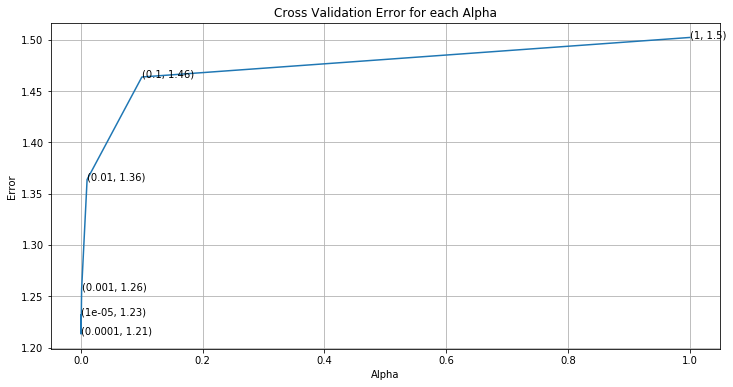

For values of best alpha:  0.0001 The train log loss is:  1.0065019048970862
For values of best alpha:  0.0001 The cv log loss is:  1.2132069870497812
For values of best alpha:  0.0001 The test log loss is:  1.1699099995665336


In [37]:
alpha = [10 ** x for x in range(-5, 1)]

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

cv_log_error= []
for i in tqdm(alpha):
    sgdc= SGDClassifier(loss= 'log', penalty= 'l2', alpha= i, random_state= 42)
    sgdc.fit(gene_train, y_train)
    cccv= CalibratedClassifierCV(base_estimator= sgdc, method= 'sigmoid')
    cccv.fit(gene_train, y_train)
    y_pred= cccv.predict_proba(gene_cv)
    cv_log_error.append(log_loss(y_cv, y_pred, labels= sgdc.classes_, eps = 1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_cv, y_pred, labels=sgdc.classes_, eps=1e-15))
    
fig, ax= plt.subplots(figsize= (12, 6))
ax.plot(alpha, cv_log_error)
for i, j in enumerate(np.round(cv_log_error, 2)):
    ax.annotate((alpha[i], np.round(j, 2)), (alpha[i], cv_log_error[i]))
plt.title('Cross Validation Error for each Alpha')
plt.xlabel('Alpha')
plt.ylabel('Error')
plt.grid()
plt.show()

best_alpha= np.argmin(cv_log_error)

sgdc= SGDClassifier(loss= 'log', penalty= 'l2', alpha= alpha[best_alpha], random_state= 42)
sgdc.fit(gene_train, y_train)
cccv= CalibratedClassifierCV(base_estimator= sgdc, method= 'sigmoid')
cccv.fit(gene_train, y_train)

y_pred= cccv.predict_proba(gene_train)
print('For values of best alpha: ', alpha[best_alpha], "The train log loss is: ", 
      log_loss(y_train, y_pred, labels= sgdc.classes_, eps = 1e-15))
y_pred= cccv.predict_proba(gene_cv)
print('For values of best alpha: ', alpha[best_alpha], "The cv log loss is: ", 
      log_loss(y_cv, y_pred, labels= sgdc.classes_, eps = 1e-15))
y_pred= cccv.predict_proba(gene_test)
print('For values of best alpha: ', alpha[best_alpha], "The test log loss is: ", 
      log_loss(y_test, y_pred, labels= sgdc.classes_, eps = 1e-15))

<p style="font-size:18px;"> <b>Q5.</b> Is the Gene feature stable across all the data sets (Test, Train, Cross validation)?</p>
<p style="font-size:16px;"> <b>Ans.</b> Yes, it is. Otherwise, the CV and Test errors would be significantly more than train error. </p>

<p style="font-size:18px;"> <b>Q6.</b> How many data points in Test and CV datasets are covered by the 230 genes in train dataset?</p>

In [38]:
words = x_train['Gene'].values
words = set(words)

cv_words = x_cv['Gene'].isin(words)
test_words = x_test['Gene'].isin(words)

print('Datapoints in CV which are also in Train are in {:.2f}%'.format((len(x_cv['Gene'][cv_words]) / x_cv.shape[0])* 100))
print('Datapoints in Test which are also in Train are in {:.2f}%'.format((len(x_test['Gene'][test_words]) / x_test.shape[0])* 100))

Datapoints in CV which are also in Train are in 97.93%
Datapoints in Test which are also in Train are in 95.78%


<h3>3.2.2 Univariate Analysis on Variation Feature</h3>

<p style="font-size:18px;"> <b>Q7.</b> Variation, What type of feature is it ?</p>
<p style="font-size:16px;"><b>Ans.</b> Variation is a categorical variable </p>
<p style="font-size:18px;"> <b>Q8.</b> How many categories are there and how are they distributed?</p>

Ans: There are 1926 different categories of Variation in the train data,and they are distributed as follows:


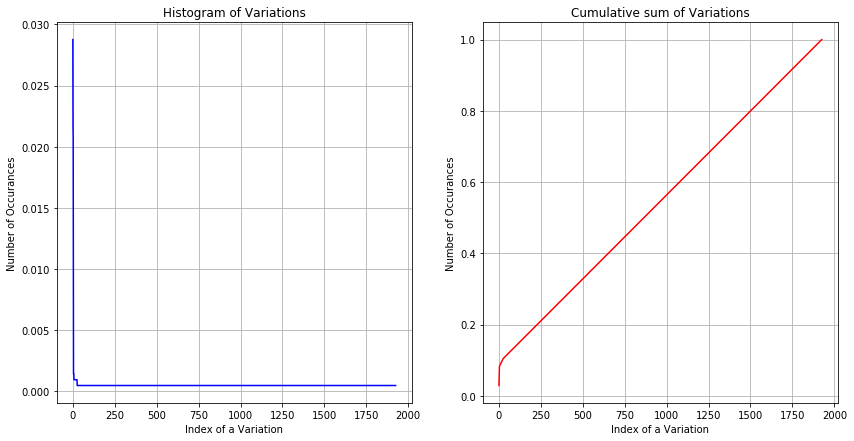

In [39]:
print("Ans: There are", x_train['Variation'].value_counts().shape[0] ,"different categories of Variation in the train data,"
      "and they are distributed as follows:")
Variations = (x_train['Variation'].value_counts()).values / sum((x_train['Variation'].value_counts()).values)
cumsum_variations = np.cumsum(Variations)

# adding plots side by side
# https://towardsdatascience.com/subplots-in-matplotlib-a-guide-and-tool-for-planning-your-plots-7d63fa632857
fig = plt.figure(figsize = (14, 7)) 
fig.add_subplot(1, 2, 1) # 1 row 2 columns 1st plot
plt.plot(Variations, 'b')
plt.xlabel('Index of a Variation')
plt.ylabel('Number of Occurances')
plt.title('Histogram of Variations')
plt.grid()

fig.add_subplot(1, 2, 2) # 1 row 2 columns 1st plot
plt.plot(cumsum_variations, 'r')
plt.xlabel('Index of a Variation')
plt.ylabel('Number of Occurances')
plt.title('Cumulative sum of Variations')
plt.grid()
plt.show()

<p style="font-size:18px;"> <b>Q9.</b> How to featurize this Variation feature ?</p>

<p style="font-size:16px;"><b>Ans.</b>There are two ways we can featurize this variable
check out this video: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/
<ol><li>One hot Encoding</li><li>Response coding</li></ol></p>
<p> We will be using both these methods to featurize the Variation Feature </p>

In [40]:
#response-coding of the Variation feature
# alpha is used for laplace smoothing
alpha = 1

# train 
variation_train_rc = np.array(get_gv_feature(alpha, "Variation", x_train))
# cv
variation_cv_rc = np.array(get_gv_feature(alpha, "Variation", x_cv))
# test
variation_test_rc = np.array(get_gv_feature(alpha, "Variation", x_test))

In [41]:
print("Variation feature is converted using respone coding method. The shape of Variation feature:", variation_train_rc.shape)

Variation feature is converted using respone coding method. The shape of Variation feature: (2121, 9)


In [42]:
# OHE
variation_vect= CountVectorizer()

# Train
variation_train= variation_vect.fit_transform(x_train['Variation'])
# CV
variation_cv= variation_vect.transform(x_cv['Variation'])
# Test
variation_test= variation_vect.transform(x_test['Variation'])

In [43]:
print("Using CountVectorizer method, the shape of Variation feature is converted to OHE:", variation_train.shape)

Using CountVectorizer method, the shape of Variation feature is converted to OHE: (2121, 1957)


<p style="font-size:18px;"> <b>Q10.</b> How good is this Variation feature  in predicting y_i?</p>

Let's build a model just like the earlier!

 17%|█▋        | 1/6 [00:00<00:01,  4.46it/s]

For values of alpha =  1e-05 The log loss is: 1.682001368508244


 33%|███▎      | 2/6 [00:00<00:00,  4.51it/s]

For values of alpha =  0.0001 The log loss is: 1.6695088440775319


 50%|█████     | 3/6 [00:00<00:00,  4.53it/s]

For values of alpha =  0.001 The log loss is: 1.670808174821951


 67%|██████▋   | 4/6 [00:00<00:00,  4.30it/s]

For values of alpha =  0.01 The log loss is: 1.6783932196829212


 83%|████████▎ | 5/6 [00:01<00:00,  4.19it/s]

For values of alpha =  0.1 The log loss is: 1.69716694217203


100%|██████████| 6/6 [00:01<00:00,  4.33it/s]

For values of alpha =  1 The log loss is: 1.700319587823367


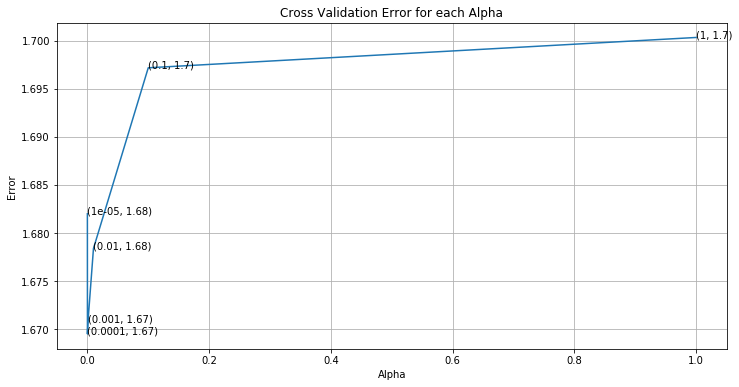

For values of best alpha:  0.0001 The train log loss is:  0.776129115044374
For values of best alpha:  0.0001 The cv log loss is:  1.6695088440775319
For values of best alpha:  0.0001 The test log loss is:  1.692506405376072


In [44]:
alpha = [10 ** x for x in range(-5, 1)]

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

cv_log_error= []
for i in tqdm(alpha):
    sgdc= SGDClassifier(loss= 'log', penalty= 'l2', alpha= i, random_state= 42)
    sgdc.fit(variation_train, y_train)
    cccv= CalibratedClassifierCV(base_estimator= sgdc, method= 'sigmoid')
    cccv.fit(variation_train, y_train)
    y_pred= cccv.predict_proba(variation_cv)
    cv_log_error.append(log_loss(y_cv, y_pred, labels= sgdc.classes_, eps = 1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_cv, y_pred, labels=sgdc.classes_, eps=1e-15))
    
fig, ax= plt.subplots(figsize= (12, 6))
ax.plot(alpha, cv_log_error)
for i, j in enumerate(np.round(cv_log_error, 2)):
    ax.annotate((alpha[i], np.round(j, 2)), (alpha[i], cv_log_error[i]))
plt.title('Cross Validation Error for each Alpha')
plt.xlabel('Alpha')
plt.ylabel('Error')
plt.grid()
plt.show()

best_alpha= np.argmin(cv_log_error)

sgdc= SGDClassifier(loss= 'log', penalty= 'l2', alpha= alpha[best_alpha], random_state= 42)
sgdc.fit(variation_train, y_train)
cccv= CalibratedClassifierCV(base_estimator= sgdc, method= 'sigmoid')
cccv.fit(variation_train, y_train)

y_pred= cccv.predict_proba(variation_train)
print('For values of best alpha: ', alpha[best_alpha], "The train log loss is: ", 
      log_loss(y_train, y_pred, labels= sgdc.classes_, eps = 1e-15))
y_pred= cccv.predict_proba(variation_cv)
print('For values of best alpha: ', alpha[best_alpha], "The cv log loss is: ", 
      log_loss(y_cv, y_pred, labels= sgdc.classes_, eps = 1e-15))
y_pred= cccv.predict_proba(variation_test)
print('For values of best alpha: ', alpha[best_alpha], "The test log loss is: ", 
      log_loss(y_test, y_pred, labels= sgdc.classes_, eps = 1e-15))

<p style="font-size:18px;"> <b>Q11.</b> Is the Variation feature stable across all the data sets (Test, Train, Cross validation)?</p>

<p style="font-size:16px;"> <b>Ans.</b> Not sure! But lets be very sure using the below analysis. </p>

In [45]:
words = x_train['Variation'].values
words = set(words)

cv_words = x_cv['Variation'].isin(words)
test_words = x_test['Variation'].isin(words)

<p style="font-size:18px;"> <b>Q12.</b> How many data points are covered by total?</p>

In [46]:
print('Ans:')
print('Datapoints in CV which are also in Train are in {:.2f}%'.format((len(x_cv['Variation'][cv_words]) / x_cv.shape[0])* 100))
print('Datapoints in Test which are also in Train are in {:.2f}%'.format((len(x_test['Variation'][test_words]) / x_test.shape[0])* 100))

Ans:
Datapoints in CV which are also in Train are in 10.17%
Datapoints in Test which are also in Train are in 10.24%


<h3>3.2.3 Univariate Analysis on Text Feature</h3>

1. How many unique words are present in train data?
2. How are word frequencies distributed?
3. How to featurize text field?
4. Is the text feature useful in predicitng y_i?
5. Is the text feature stable across train, test and CV datasets?

In [47]:
# cls_text is a data frame
# for every row in data fram consider the 'TEXT'
# split the words by space
# make a dict with those words
# increment its count whenever we see that word

def extract_dictionary_paddle(cls_text):
    dictionary = defaultdict(int)
    for index, row in cls_text.iterrows():
        for word in row['TEXT'].split():
            dictionary[word] +=1
    return dictionary

In [48]:
# https://stackoverflow.com/a/1602964
def get_text_responsecoding(df):
    text_feature_responseCoding = np.zeros((df.shape[0],9))
    for i in range(0,9):
        row_index = 0
        for index, row in df.iterrows():
            sum_prob = 0
            for word in row['TEXT'].split():
                sum_prob += math.log(((dict_list[i].get(word,0)+10 )/(total_dict.get(word,0)+90)))
            text_feature_responseCoding[row_index][i] = math.exp(sum_prob/len(row['TEXT'].split()))
            row_index += 1
    return text_feature_responseCoding

In [70]:
# building a TfidfVectorizer with all the words that occured minimum 3 times in train data
text_vect= TfidfVectorizer(min_df= 3, ngram_range= (1, 2), max_features = 5000)
text_train = text_vect.fit_transform(x_train['TEXT'])

# getting all the feature names (words)
text_train_vocab= text_vect.get_feature_names()

# train_text_feature_onehotCoding.sum(axis=0).A1 will sum every row and returns (1*number of features) vector
text_train_feat_counts = text_train.sum(axis=0).A1

# zip(list(text_features),text_fea_counts) will zip a word with its number of times it occured
text_train_feat_dict = dict(zip(list(text_train_vocab), text_train_feat_counts))

print("Total number of unique words in train data : ", len(text_train_vocab))

Total number of unique words in train data :  5000


In [50]:
dict_list = []
# dict_list =[] contains 9 dictoinaries each corresponds to a class
for i in range(1,10):
    cls_text = x_train[x_train['Class'] == i]
    # build a word dict based on the words in that class
    dict_list.append(extract_dictionary_paddle(cls_text))
    # append it to dict_list

# dict_list[i] is build on i'th  class text data
# total_dict is buid on whole training text data
total_dict = extract_dictionary_paddle(x_train)


confuse_array = []
for i in text_train_vocab:
    ratios = []
    max_val = -1
    for j in range(0,9):
        ratios.append((dict_list[j][i]+10 )/(total_dict[i]+90))
    confuse_array.append(ratios)
confuse_array = np.array(confuse_array)

In [51]:
#response coding of text features
text_train_rc= get_text_responsecoding(x_train)
text_cv_rc= get_text_responsecoding(x_cv)
text_test_rc= get_text_responsecoding(x_test)

In [52]:
# https://stackoverflow.com/a/16202486
# we convert each row values such that they sum to 1  
text_train_rc= (text_train_rc.T / text_train_rc.sum(axis=1)).T
text_cv_rc= (text_cv_rc.T / text_cv_rc.sum(axis=1)).T
text_test_rc= (text_test_rc.T / text_test_rc.sum(axis=1)).T

In [71]:
# don't forget to normalize every feature
text_train= normalize(text_train, axis=0)

# CV
text_cv= text_vect.transform(x_cv['TEXT'])
# don't forget to normalize every feature
text_cv= normalize(text_cv, axis=0)

# Test
text_test= text_vect.transform(x_test['TEXT'])
# don't forget to normalize every feature
text_test= normalize(text_test, axis=0)

In [72]:
#https://stackoverflow.com/a/2258273/4084039
sorted_text= dict(sorted(text_train_feat_dict.items(), key=lambda x: x[1] , reverse=True))
sorted_text_occur = np.array(list(sorted_text.values()))

 17%|█▋        | 1/6 [00:11<00:56, 11.32s/it]

For values of alpha =  1e-05 The log loss is: 1.1418491288157646


 33%|███▎      | 2/6 [00:17<00:38,  9.70s/it]

For values of alpha =  0.0001 The log loss is: 1.161822515342003


 50%|█████     | 3/6 [00:21<00:23,  7.97s/it]

For values of alpha =  0.001 The log loss is: 1.3278244445387088


 67%|██████▋   | 4/6 [00:24<00:13,  6.55s/it]

For values of alpha =  0.01 The log loss is: 1.8853271636467424


 83%|████████▎ | 5/6 [00:27<00:05,  5.59s/it]

For values of alpha =  0.1 The log loss is: 2.195107286992929


100%|██████████| 6/6 [00:30<00:00,  5.07s/it]

For values of alpha =  1 The log loss is: 2.154836727318279


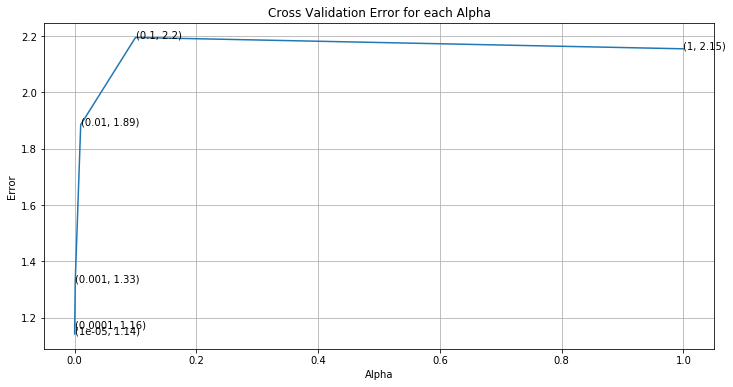

For values of best alpha:  1e-05 The train log loss is:  0.6762806418765435
For values of best alpha:  1e-05 The cv log loss is:  1.1418491288157646
For values of best alpha:  1e-05 The test log loss is:  1.0420133908817764


In [74]:
alpha = [10 ** x for x in range(-5, 1)]

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

cv_log_error= []
for i in tqdm(alpha):
    sgdc= SGDClassifier(loss= 'log', penalty= 'l2', alpha= i, random_state= 42)
    sgdc.fit(text_train, y_train)
    cccv= CalibratedClassifierCV(base_estimator= sgdc, method= 'sigmoid')
    cccv.fit(text_train, y_train)
    y_pred= cccv.predict_proba(text_cv)
    cv_log_error.append(log_loss(y_cv, y_pred, labels= sgdc.classes_, eps = 1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_cv, y_pred, labels=sgdc.classes_, eps=1e-15))
    
fig, ax= plt.subplots(figsize= (12, 6))
ax.plot(alpha, cv_log_error)
for i, j in enumerate(np.round(cv_log_error, 2)):
    ax.annotate((alpha[i], np.round(j, 2)), (alpha[i], cv_log_error[i]))
plt.title('Cross Validation Error for each Alpha')
plt.xlabel('Alpha')
plt.ylabel('Error')
plt.grid()
plt.show()

best_alpha= np.argmin(cv_log_error)

sgdc= SGDClassifier(loss= 'log', penalty= 'l2', alpha= alpha[best_alpha], random_state= 42)
sgdc.fit(text_train, y_train)
cccv= CalibratedClassifierCV(base_estimator= sgdc, method= 'sigmoid')
cccv.fit(text_train, y_train)

y_pred= cccv.predict_proba(text_train)
print('For values of best alpha: ', alpha[best_alpha], "The train log loss is: ", 
      log_loss(y_train, y_pred, labels= sgdc.classes_, eps = 1e-15))
y_pred= cccv.predict_proba(text_cv)
print('For values of best alpha: ', alpha[best_alpha], "The cv log loss is: ", 
      log_loss(y_cv, y_pred, labels= sgdc.classes_, eps = 1e-15))
y_pred= cccv.predict_proba(text_test)
print('For values of best alpha: ', alpha[best_alpha], "The test log loss is: ", 
      log_loss(y_test, y_pred, labels= sgdc.classes_, eps = 1e-15))

<p style="font-size:18px;"> <b>Q.</b> Is the Text feature stable across all the data sets (Test, Train, Cross validation)?</p>

<p style="font-size:16px;"> <b>Ans.</b> Yes, it seems like! </p>

In [57]:
def get_intersec_text(df):
    df_text_vec = CountVectorizer(min_df= 3, ngram_range= (1, 2))
    df_text = df_text_vec.fit_transform(df['TEXT'])
    df_text_vocab = df_text_vec.get_feature_names()

    df_text_counts = df_text.sum(axis=0).A1
    df_text_dict = dict(zip(list(df_text_vocab), df_text_counts))
    len1 = len(set(df_text_vocab))
    len2 = len(set(text_train_vocab) & set(df_text_vocab))
    return len1,len2

In [58]:
# CV
len1,len2 = get_intersec_text(x_cv)
print(np.round((len2/len1)*100, 3), "% of word of Cross Validation appeared in train data")

# Test
len1,len2 = get_intersec_text(x_test)
print(np.round((len2/len1)*100, 3), "% of word of test data appeared in train data")

96.462 % of word of Cross Validation appeared in train data
94.677 % of word of test data appeared in train data


<h1>4. Machine Learning Models</h1>

In [105]:
#Data preparation for ML models.

#Misc. functionns for ML models

def predict_and_plot_confusion_matrix(x_train_ohe, ytrain, x_test_ohe, ytest, clf):
    clf.fit(x_train_ohe, ytrain)
    cccv = CalibratedClassifierCV(clf, method="sigmoid")
    cccv.fit(x_train_ohe, ytrain)
    y_pred = cccv.predict(x_test_ohe)

    # for calculating log_loss we willl provide the array of probabilities belongs to each class
    print("Log loss :",log_loss(ytest, cccv.predict_proba(x_test_ohe)))
    # calculating the number of data points that are misclassified
    print("Number of mis-classified points :", np.count_nonzero((y_pred - ytest))/ytest.shape[0])
    print()
    print('*'*35 +' Confusion Matrix ' + '*'*35)
    c_m = confusion_matrix(ytest, y_pred)
    heatmap(c_m)
    # Precision
    print('*'*35 +' Precision Matrix ' + '*'*35)
    precision = c_m / c_m.sum(axis=0)
    heatmap(precision)
    # Recall
    print('*'*35 +' Recall Matrix ' + '*'*35)
    recall = (c_m.T / c_m.sum(axis=0)).T
    heatmap(recall)

In [60]:
def report_log_loss(x_train, y_train, x_test, y_test, clf):
    clf.fit(x_train, y_train)
    cccv = CalibratedClassifierCV(clf, method="sigmoid")
    cccv.fit(x_train, y_train)
    cccv_probs = cccv.predict_proba(x_test)
    return log_loss(y_test, cccv_probs, eps=1e-15) # log-loss between predicted prob label and test label

In [61]:
# this function will be used just for naive bayes
# for the given indices, we will print the name of the features
# and we will check whether the feature present in the test point text or not
def get_impfeature_names(indices, text, gene, var, no_features):
    gene_count_vec = CountVectorizer()
    var_count_vec = CountVectorizer()
    text_count_vec = CountVectorizer(min_df=3, ngram_range= (1, 2))
    
    gene_vec = gene_count_vec.fit(x_train['Gene'])
    var_vec  = var_count_vec.fit(x_train['Variation'])
    text_vec = text_count_vec.fit(x_train['TEXT'])
    
    fea1_len = len(gene_vec.get_feature_names())
    fea2_len = len(var_count_vec.get_feature_names())
    
    word_present = 0
    for i,v in enumerate(indices):
        if (v < fea1_len):
            word = gene_vec.get_feature_names()[v]
            yes_no = True if word == gene else False
            if yes_no:
                word_present += 1
                print(i, "Gene feature [{}] present in test data point [{}]".format(word,yes_no))
        elif (v < fea1_len+fea2_len):
            word = var_vec.get_feature_names()[v-(fea1_len)]
            yes_no = True if word == var else False
            if yes_no:
                word_present += 1
                print(i, "variation feature [{}] present in test data point [{}]".format(word,yes_no))
        else:
            word = text_vec.get_feature_names()[v-(fea1_len+fea2_len)]
            yes_no = True if word in text.split() else False
            if yes_no:
                word_present += 1
                print(i, "Text feature [{}] present in test data point [{}]".format(word,yes_no))

    print("Out of the top ",no_features," features ", word_present, "are present in query point")

<p style="font-size:24px;text-align:Center"> <b>Stacking the three types of features </b><p>

In [75]:
# merging gene, variance and text features

# building train, test and cross validation data sets
# a = [[1, 2], 
#      [3, 4]]
# b = [[4, 5], 
#      [6, 7]]
# hstack(a, b) = [[1, 2, 4, 5],
#                [ 3, 4, 6, 7]]

# Y- Label
ytrain = np.array(y_train)
ycv = np.array(y_cv)
ytest = np.array(y_test)

# OHE
x_train_ohe = hstack((gene_train, variation_train, text_train)).tocsr()
x_cv_ohe = hstack((gene_cv, variation_cv, text_cv)).tocsr()
x_test_ohe = hstack((gene_test, variation_test, text_test)).tocsr()

# Response coding
x_train_rc = np.hstack((gene_train_rc, variation_train_rc, text_train_rc))
x_cv_rc = np.hstack((gene_cv_rc, variation_cv_rc, text_cv_rc))
x_test_rc = np.hstack((gene_test_rc, variation_test_rc, text_test_rc))


In [77]:
print("One hot encoding features & Tfidf:")
print("(number of data points * number of features) in Train data = ", x_train_ohe.shape)
print("(number of data points * number of features) in CV data = ", x_cv_ohe.shape)
print("(number of data points * number of features) in Test data =", x_test_ohe.shape)

One hot encoding features & Tfidf:
(number of data points * number of features) in Train data =  (2121, 7186)
(number of data points * number of features) in CV data =  (531, 7186)
(number of data points * number of features) in Test data = (664, 7186)


In [64]:
print(" Response encoding features :")
print("(number of data points * number of features) in train data = ", x_train_rc.shape)
print("(number of data points * number of features) in test data = ", x_cv_rc.shape)
print("(number of data points * number of features) in cross validation data =", x_test_rc.shape)

 Response encoding features :
(number of data points * number of features) in train data =  (2121, 27)
(number of data points * number of features) in test data =  (531, 27)
(number of data points * number of features) in cross validation data = (664, 27)


<h2>4.1. Base Line Model</h2>

<h3>4.1.1. Naive Bayes</h3>

<h4>4.1.1.1. Hyper parameter tuning</h4>

 11%|█         | 1/9 [00:00<00:02,  2.78it/s]

For values of alpha =  1e-05 The log loss is: 1.3047805919441118


 22%|██▏       | 2/9 [00:00<00:02,  2.84it/s]

For values of alpha =  0.0001 The log loss is: 1.3077504640656623


 33%|███▎      | 3/9 [00:01<00:02,  2.86it/s]

For values of alpha =  0.001 The log loss is: 1.3113847659614661


 44%|████▍     | 4/9 [00:01<00:01,  2.88it/s]

For values of alpha =  0.01 The log loss is: 1.3214269663648144


 56%|█████▌    | 5/9 [00:01<00:01,  2.89it/s]

For values of alpha =  0.1 The log loss is: 1.3441880895425748


 67%|██████▋   | 6/9 [00:02<00:01,  2.74it/s]

For values of alpha =  1 The log loss is: 1.3708175852898348


 78%|███████▊  | 7/9 [00:02<00:00,  2.68it/s]

For values of alpha =  10 The log loss is: 1.4353242825886094


 89%|████████▉ | 8/9 [00:02<00:00,  2.65it/s]

For values of alpha =  100 The log loss is: 1.4839085861316486


100%|██████████| 9/9 [00:03<00:00,  2.71it/s]

For values of alpha =  1000 The log loss is: 1.474392350284852


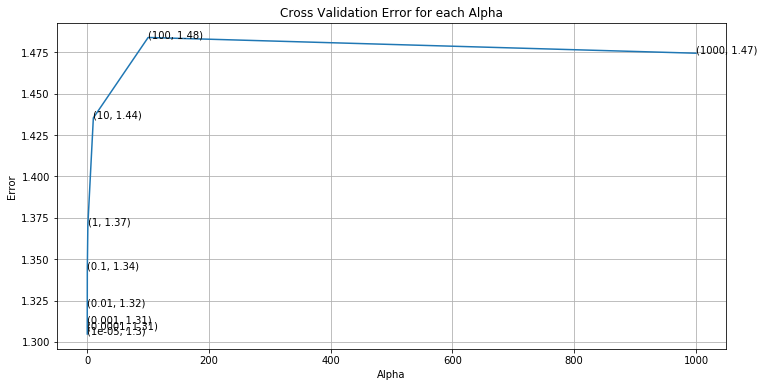

For values of best alpha:  1e-05 The train log loss is:  0.6622901424638779
For values of best alpha:  1e-05 The cv log loss is:  1.3047805919441118
For values of best alpha:  1e-05 The test log loss is:  1.2154567029971501


In [78]:
alpha = [10 ** x for x in range(-5, 4)]

# find more about Multinomial Naive base function here http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html
# -------------------------
# default paramters
# sklearn.naive_bayes.MultinomialNB(alpha=1.0, fit_prior=True, class_prior=None)

# some of methods of MultinomialNB()
# fit(X, y[, sample_weight])	Fit Naive Bayes classifier according to X, y
# predict(X)	Perform classification on an array of test vectors X.
# predict_log_proba(X)	Return log-probability estimates for the test vector X.

# find more about CalibratedClassifierCV here at http://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
# ----------------------------
# default paramters
# sklearn.calibration.CalibratedClassifierCV(base_estimator=None, method=’sigmoid’, cv=3)
#
# some of the methods of CalibratedClassifierCV()
# fit(X, y[, sample_weight])	Fit the calibrated model
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict the target of new samples.
# predict_proba(X)	Posterior probabilities of classification


cv_log_error= []
for i in tqdm(alpha):
    mnb= MultinomialNB(alpha= i)
    mnb.fit(x_train_ohe, ytrain)
    cccv= CalibratedClassifierCV(base_estimator= mnb, method= 'sigmoid')
    cccv.fit(x_train_ohe, ytrain)
    y_pred= cccv.predict_proba(x_cv_ohe)
    cv_log_error.append(log_loss(ycv, y_pred, labels= mnb.classes_, eps = 1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_cv, y_pred, labels=mnb.classes_, eps=1e-15))
    
fig, ax= plt.subplots(figsize= (12, 6))
ax.plot(alpha, cv_log_error)
for i, j in enumerate(np.round(cv_log_error, 2)):
    ax.annotate((alpha[i], np.round(j, 2)), (alpha[i], cv_log_error[i]))
plt.title('Cross Validation Error for each Alpha')
plt.xlabel('Alpha')
plt.ylabel('Error')
plt.grid()
plt.show()

best_alpha= np.argmin(cv_log_error)

mnb= MultinomialNB(alpha= alpha[best_alpha])
mnb.fit(x_train_ohe, ytrain)
cccv= CalibratedClassifierCV(base_estimator= mnb, method= 'sigmoid')
cccv.fit(x_train_ohe, ytrain)

y_pred= cccv.predict_proba(x_train_ohe)
print('For values of best alpha: ', alpha[best_alpha], "The train log loss is: ", 
      log_loss(ytrain, y_pred, labels= mnb.classes_, eps = 1e-15))
y_pred= cccv.predict_proba(x_cv_ohe)
print('For values of best alpha: ', alpha[best_alpha], "The cv log loss is: ", 
      log_loss(ycv, y_pred, labels= mnb.classes_, eps = 1e-15))
y_pred= cccv.predict_proba(x_test_ohe)
print('For values of best alpha: ', alpha[best_alpha], "The test log loss is: ", 
      log_loss(ytest, y_pred, labels= mnb.classes_, eps = 1e-15))

## Observations:

* This is Imbalanced dataset
* As I have considered bigrams in text vectorizer, the features (Top 5000):- 7186, and the log loss:- 1.21 

<h4>4.1.1.2. Testing the model with best hyper paramters</h4>

Log loss : 1.2154567029971501
Number of mis-classified points : 0.36596385542168675


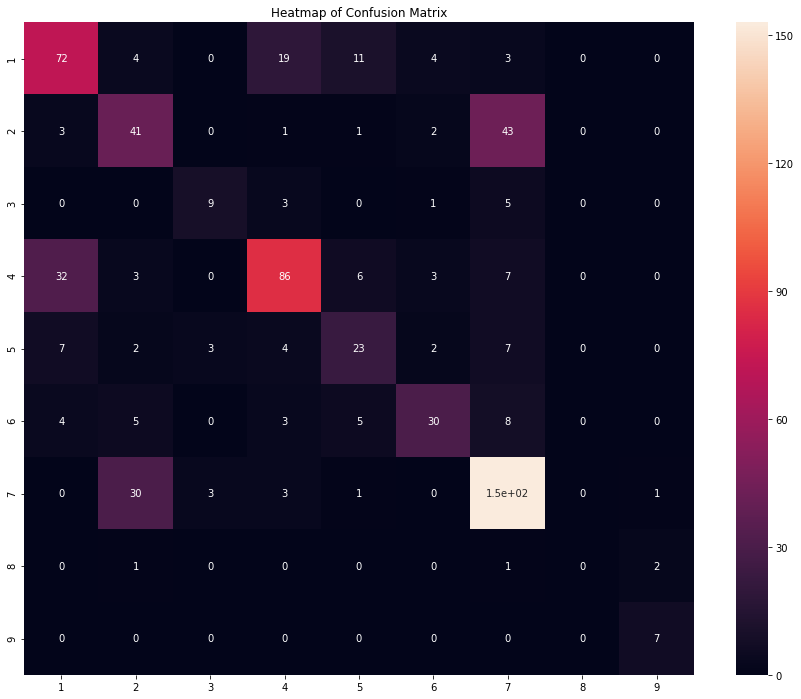

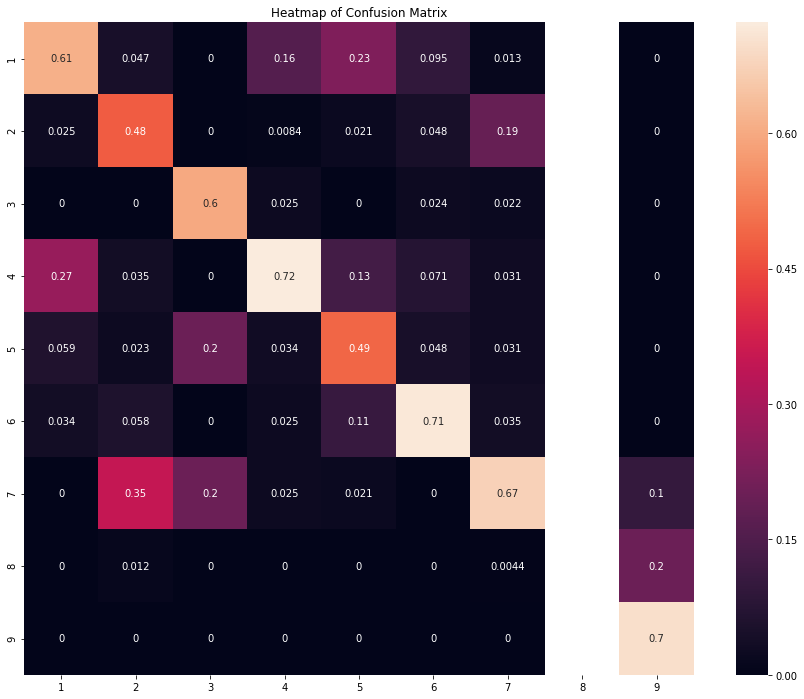

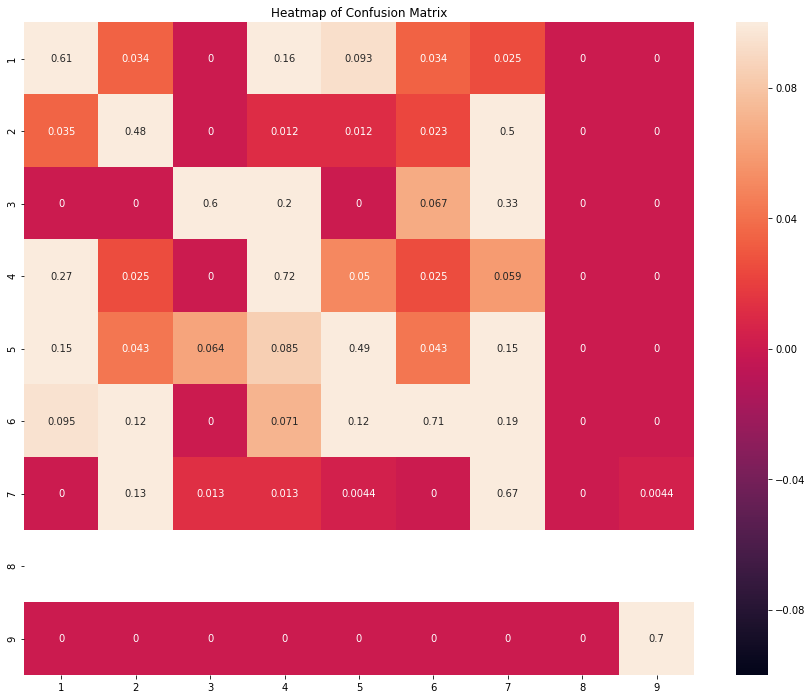

In [80]:
predict_and_plot_confusion_matrix(x_train_ohe, ytrain, x_test_ohe, ytest, MultinomialNB(alpha = alpha[best_alpha]))

<h4>4.1.1.3. Feature Importance, Correctly classified point</h4>

In [84]:
test_point_index = 2
no_feature = 100
predicted_cls = cccv.predict(x_test_ohe[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(cccv.predict_proba(x_test_ohe[test_point_index]), 4))
print("Actual Class :", ytest[test_point_index])
indices = np.argsort(-mnb.coef_)[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], x_test['TEXT'].iloc[test_point_index], x_test['Gene'].iloc[test_point_index], 
                     x_test['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 6
Predicted Class Probabilities: [[0.0578 0.0568 0.015  0.0729 0.0388 0.6604 0.0914 0.0045 0.0024]]
Actual Class : 6
--------------------------------------------------
Out of the top  100  features  0 are present in query point


<h4>4.1.1.4. Feature Importance, Incorrectly classified point</h4>

In [88]:
test_point_index = 90
no_feature = 100
predicted_cls = cccv.predict(x_test_ohe[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(cccv.predict_proba(x_test_ohe[test_point_index]),4))
print("Actual Class :", ytest[test_point_index])
indices = np.argsort(-mnb.coef_)[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], x_test['TEXT'].iloc[test_point_index], x_test['Gene'].iloc[test_point_index], 
                     x_test['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 7
Predicted Class Probabilities: [[0.0681 0.0675 0.0254 0.0868 0.0459 0.039  0.6591 0.0053 0.0029]]
Actual Class : 3
--------------------------------------------------
Out of the top  100  features  0 are present in query point


<h2>4.2. K Nearest Neighbour Classification</h2>

<h3>4.2.1. Hyper parameter tuning</h3>

 12%|█▎        | 1/8 [00:00<00:05,  1.25it/s]

For values of alpha =  5 The log loss is: 1.1311676344071935


 25%|██▌       | 2/8 [00:01<00:04,  1.28it/s]

For values of alpha =  11 The log loss is: 1.1546262072100628


 38%|███▊      | 3/8 [00:02<00:03,  1.30it/s]

For values of alpha =  15 The log loss is: 1.1557390757419992


 50%|█████     | 4/8 [00:03<00:03,  1.31it/s]

For values of alpha =  21 The log loss is: 1.1588252832343167


 62%|██████▎   | 5/8 [00:03<00:02,  1.33it/s]

For values of alpha =  31 The log loss is: 1.1431537432680594


 75%|███████▌  | 6/8 [00:04<00:01,  1.33it/s]

For values of alpha =  41 The log loss is: 1.1301152119603657


 88%|████████▊ | 7/8 [00:05<00:00,  1.34it/s]

For values of alpha =  51 The log loss is: 1.1417246619464323


100%|██████████| 8/8 [00:05<00:00,  1.34it/s]

For values of alpha =  99 The log loss is: 1.166420946945628


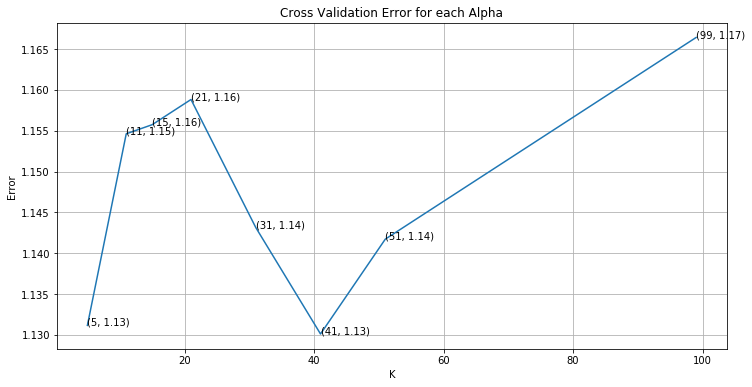

For values of best alpha:  41 The train log loss is:  0.8485923706654264
For values of best alpha:  41 The cv log loss is:  1.1301152119603657
For values of best alpha:  41 The test log loss is:  1.0839157361302618


In [89]:
# find more about KNeighborsClassifier() here http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
# -------------------------
# default parameter
# KNeighborsClassifier(n_neighbors=5, weights=’uniform’, algorithm=’auto’, leaf_size=30, p=2, 
# metric=’minkowski’, metric_params=None, n_jobs=1, **kwargs)

# methods of
# fit(X, y) : Fit the model using X as training data and y as target values
# predict(X):Predict the class labels for the provided data
# predict_proba(X):Return probability estimates for the test data X.

# find more about CalibratedClassifierCV here at http://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
# ----------------------------
# default paramters
# sklearn.calibration.CalibratedClassifierCV(base_estimator=None, method=’sigmoid’, cv=3)
#
# some of the methods of CalibratedClassifierCV()
# fit(X, y[, sample_weight])	Fit the calibrated model
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict the target of new samples.
# predict_proba(X)	Posterior probabilities of classification

k= [5, 11, 15, 21, 31, 41, 51, 99]

cv_log_error= []
for i in tqdm(k):
    knn= KNeighborsClassifier(n_neighbors= i, n_jobs= -1)
    knn.fit(x_train_rc, ytrain) # Response coding
    cccv= CalibratedClassifierCV(base_estimator= knn, method= 'sigmoid')
    cccv.fit(x_train_rc, ytrain)
    y_pred= cccv.predict_proba(x_cv_rc)
    cv_log_error.append(log_loss(ycv, y_pred, labels= knn.classes_, eps = 1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print('For values of K= ', i, "The log loss is:",log_loss(ycv, y_pred, labels=knn.classes_, eps=1e-15))
    
fig, ax= plt.subplots(figsize= (12, 6))
ax.plot(k, cv_log_error)
for i, j in enumerate(np.round(cv_log_error, 2)):
    ax.annotate((k[i], np.round(j, 2)), (k[i], cv_log_error[i]))
plt.title('Cross Validation Error for each K')
plt.xlabel('K')
plt.ylabel('Error')
plt.grid()
plt.show()

best_k= np.argmin(cv_log_error)

knn= KNeighborsClassifier(n_neighbors= k[best_k], n_jobs= -1)
knn.fit(x_train_rc, ytrain)
cccv= CalibratedClassifierCV(base_estimator= knn, method= 'sigmoid')
cccv.fit(x_train_rc, ytrain)

y_pred= cccv.predict_proba(x_train_rc)
print('For values of best k: ', k[best_k], "The train log loss is: ", 
      log_loss(ytrain, y_pred, labels= knn.classes_, eps = 1e-15))
y_pred= cccv.predict_proba(x_cv_rc)
print('For values of best k: ', k[best_k], "The cv log loss is: ", 
      log_loss(ycv, y_pred, labels= knn.classes_, eps = 1e-15))
y_pred= cccv.predict_proba(x_test_rc)
print('For values of best k: ', k[best_k], "The test log loss is: ", 
      log_loss(ytest, y_pred, labels= knn.classes_, eps = 1e-15))

<h3>4.2.2. Testing the model with best hyper paramters</h3>

Log loss : 1.0839157361302618
Number of mis-classified points : 0.3855421686746988


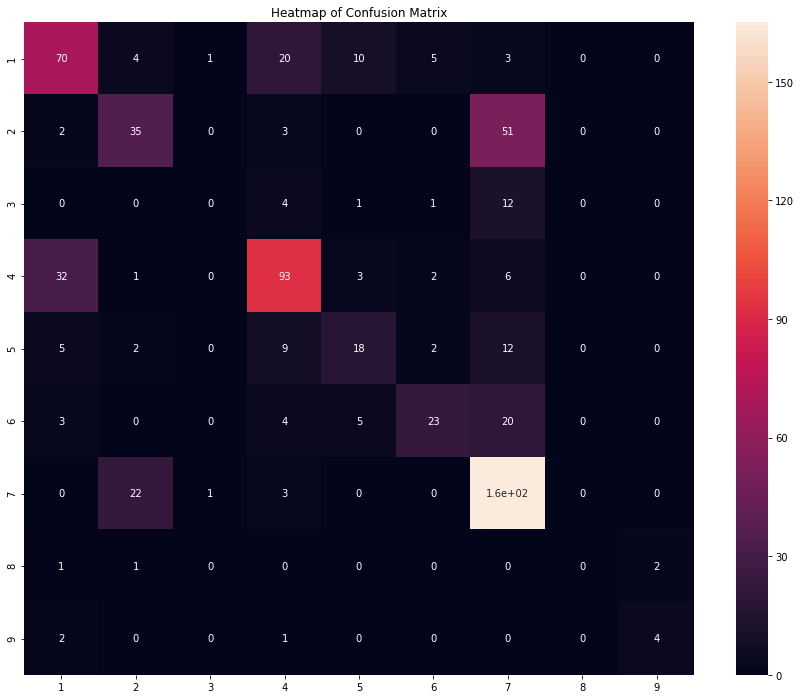

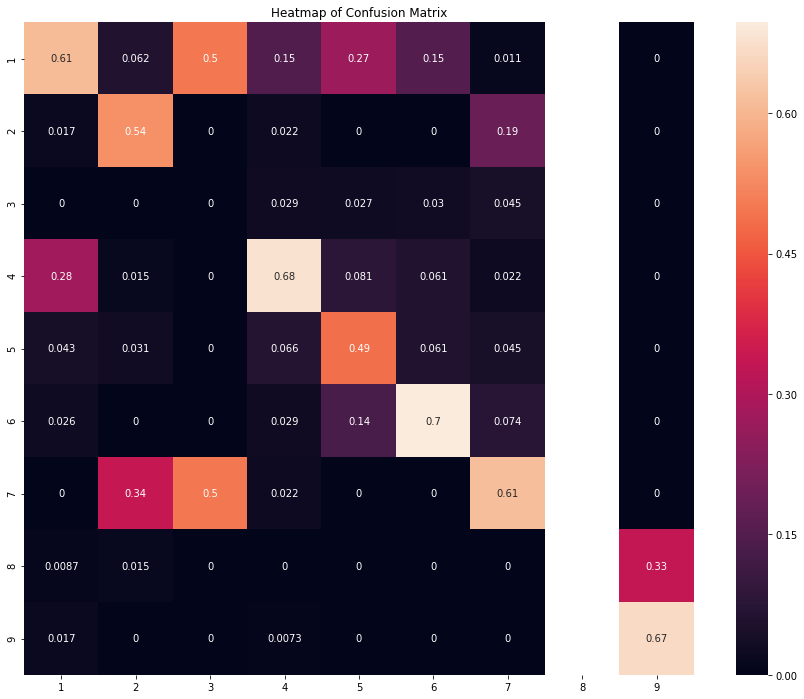

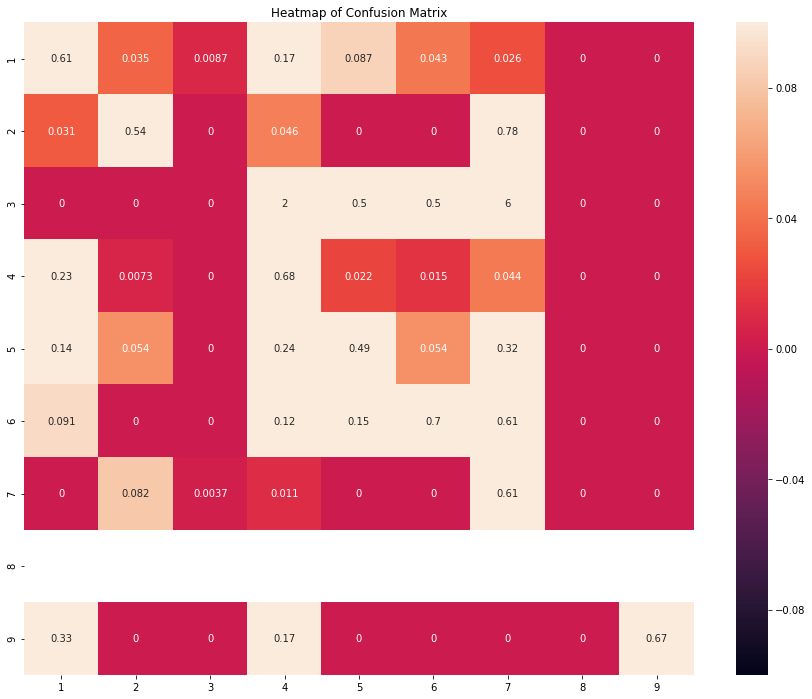

In [90]:
predict_and_plot_confusion_matrix(x_train_rc, ytrain, x_test_rc, ytest, 
                                  KNeighborsClassifier(n_neighbors= k[best_k], n_jobs= -1))

<h3>4.2.3.Sample Query point -1</h3>

In [92]:
test_point_index = 1
predicted_cls = cccv.predict(x_test_rc[0].reshape(1, -1))
print("Predicted Class :", predicted_cls[0])
print("Actual Class :", ytest[test_point_index])
neighbors = knn.kneighbors(x_test_rc[test_point_index].reshape(1, -1), k[best_k])
print("The ",k[best_k]," nearest neighbours of the test points belongs to classes",ytrain[neighbors[1][0]])
print("Fequency of nearest points :",Counter(ytrain[neighbors[1][0]]))

Predicted Class : 6
Actual Class : 1
The  41  nearest neighbours of the test points belongs to classes [1 1 1 1 4 1 1 1 1 1 4 4 1 1 1 1 1 1 1 1 4 1 1 1 1 1 1 1 1 1 6 1 1 1 1 1 4
 1 4 1 1]
Fequency of nearest points : Counter({1: 34, 4: 6, 6: 1})


<h3>4.2.4.Sample Query point -2</h3>

In [97]:
test_point_index = 5
predicted_cls = cccv.predict(x_test_rc[0].reshape(1, -1))
print("Predicted Class :", predicted_cls[0])
print("Actual Class :", ytest[test_point_index])
neighbors = knn.kneighbors(x_test_rc[test_point_index].reshape(1, -1), k[best_k])
print("The ",k[best_k]," nearest neighbours of the test points belongs to classes",ytrain[neighbors[1][0]])
print("Fequency of nearest points :",Counter(ytrain[neighbors[1][0]]))

Predicted Class : 6
Actual Class : 6
The  41  nearest neighbours of the test points belongs to classes [1 5 6 7 1 4 2 7 1 7 6 6 4 7 1 6 1 5 1 1 3 1 5 9 1 2 1 4 1 6 7 5 1 8 1 4 6
 4 8 2 8]
Fequency of nearest points : Counter({1: 13, 6: 6, 4: 5, 7: 5, 5: 4, 2: 3, 8: 3, 3: 1, 9: 1})


<h2>4.3. Logistic Regression</h2>

<h3>4.3.1. With Class balancing</h3>

<h4>4.3.1.1. Hyper paramter tuning</h4>

 11%|█         | 1/9 [00:04<00:33,  4.24s/it]

For values of alpha =  1e-06 The log loss is: 1.1195204491654112


 22%|██▏       | 2/9 [00:07<00:28,  4.08s/it]

For values of alpha =  1e-05 The log loss is: 1.0870685464183478


 33%|███▎      | 3/9 [00:11<00:22,  3.82s/it]

For values of alpha =  0.0001 The log loss is: 1.0583082152823189


 44%|████▍     | 4/9 [00:15<00:19,  3.90s/it]

For values of alpha =  0.001 The log loss is: 1.073150383317793


 56%|█████▌    | 5/9 [00:18<00:14,  3.66s/it]

For values of alpha =  0.01 The log loss is: 1.1645269072596407


 67%|██████▋   | 6/9 [00:21<00:10,  3.44s/it]

For values of alpha =  0.1 The log loss is: 1.6249840712964545


 78%|███████▊  | 7/9 [00:23<00:06,  3.13s/it]

For values of alpha =  1 The log loss is: 1.8168337979221387


 89%|████████▉ | 8/9 [00:25<00:02,  2.82s/it]

For values of alpha =  10 The log loss is: 1.8402408805452228


100%|██████████| 9/9 [00:27<00:00,  3.11s/it]

For values of alpha =  100 The log loss is: 1.8429143760059246


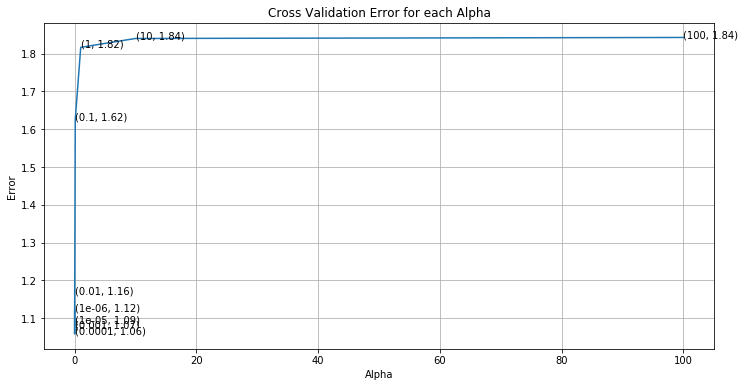

For values of best alpha:  0.0001 The train log loss is:  0.4232396135673121
For values of best alpha:  0.0001 The cv log loss is:  1.0583082152823189
For values of best alpha:  0.0001 The test log loss is:  0.9621309970690596


In [98]:
alpha = [10 ** x for x in range(-6, 3)]

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

# find more about CalibratedClassifierCV here at http://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
# ----------------------------
# default paramters
# sklearn.calibration.CalibratedClassifierCV(base_estimator=None, method=’sigmoid’, cv=3)
#
# some of the methods of CalibratedClassifierCV()
# fit(X, y[, sample_weight])	Fit the calibrated model
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict the target of new samples.
# predict_proba(X)	Posterior probabilities of classification


cv_log_error= []
for i in tqdm(alpha):
    sgdc= SGDClassifier(loss= 'log', penalty= 'l2', alpha= i, random_state= 42, class_weight= 'balanced')
    sgdc.fit(x_train_ohe, ytrain)
    cccv= CalibratedClassifierCV(base_estimator= sgdc, method= 'sigmoid')
    cccv.fit(x_train_ohe, ytrain)
    y_pred= cccv.predict_proba(x_cv_ohe)
    cv_log_error.append(log_loss(ycv, y_pred, labels= sgdc.classes_, eps = 1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(ycv, y_pred, labels=sgdc.classes_, eps=1e-15))
    
fig, ax= plt.subplots(figsize= (12, 6))
ax.plot(alpha, cv_log_error)
for i, j in enumerate(np.round(cv_log_error, 2)):
    ax.annotate((alpha[i], np.round(j, 2)), (alpha[i], cv_log_error[i]))
plt.title('Cross Validation Error for each Alpha')
plt.xlabel('Alpha')
plt.ylabel('Error')
plt.grid()
plt.show()

best_alpha= np.argmin(cv_log_error)

sgdc= SGDClassifier(loss= 'log', penalty= 'l2', alpha= alpha[best_alpha], random_state= 42, class_weight= 'balanced')
sgdc.fit(x_train_ohe, ytrain)
cccv= CalibratedClassifierCV(base_estimator= sgdc, method= 'sigmoid')
cccv.fit(x_train_ohe, ytrain)

y_pred= cccv.predict_proba(x_train_ohe)
print('For values of best alpha: ', alpha[best_alpha], "The train log loss is: ", 
      log_loss(ytrain, y_pred, labels= sgdc.classes_, eps = 1e-15))
y_pred= cccv.predict_proba(x_cv_ohe)
print('For values of best alpha: ', alpha[best_alpha], "The cv log loss is: ", 
      log_loss(ycv, y_pred, labels= sgdc.classes_, eps = 1e-15))
y_pred= cccv.predict_proba(x_test_ohe)
print('For values of best alpha: ', alpha[best_alpha], "The test log loss is: ", 
      log_loss(ytest, y_pred, labels= sgdc.classes_, eps = 1e-15))

<h4>4.3.1.2. Testing the model with best hyper paramters</h4>

Log loss : 0.9621309970690596
Number of mis-classified points : 0.32680722891566266

*********************************** Confusion Matrix ***********************************


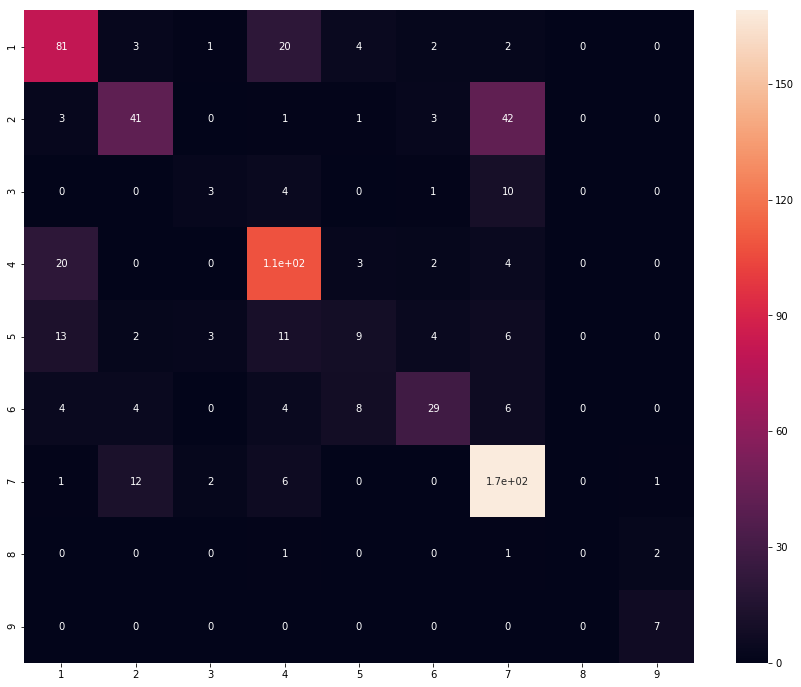

*********************************** Precision Matrix ***********************************


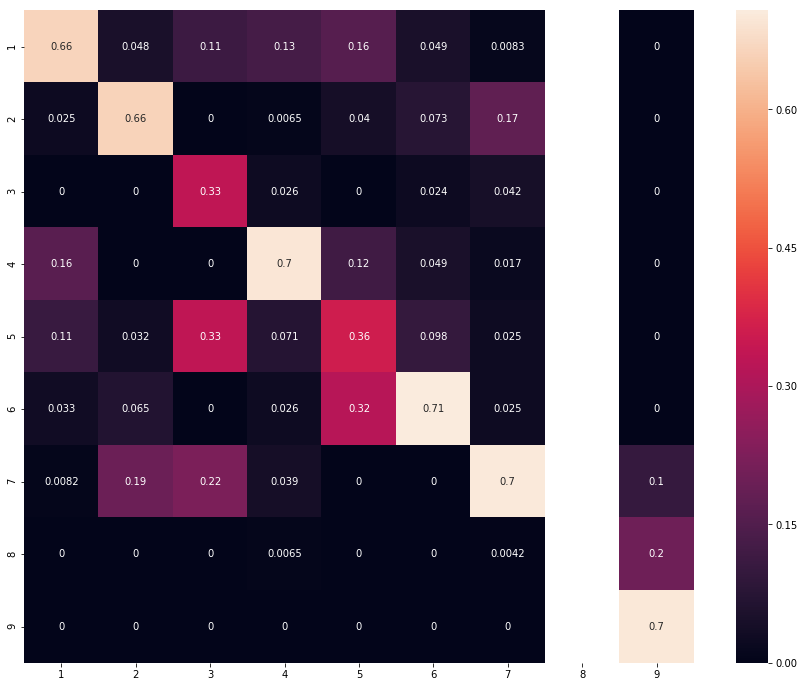

*********************************** Recall Matrix ***********************************


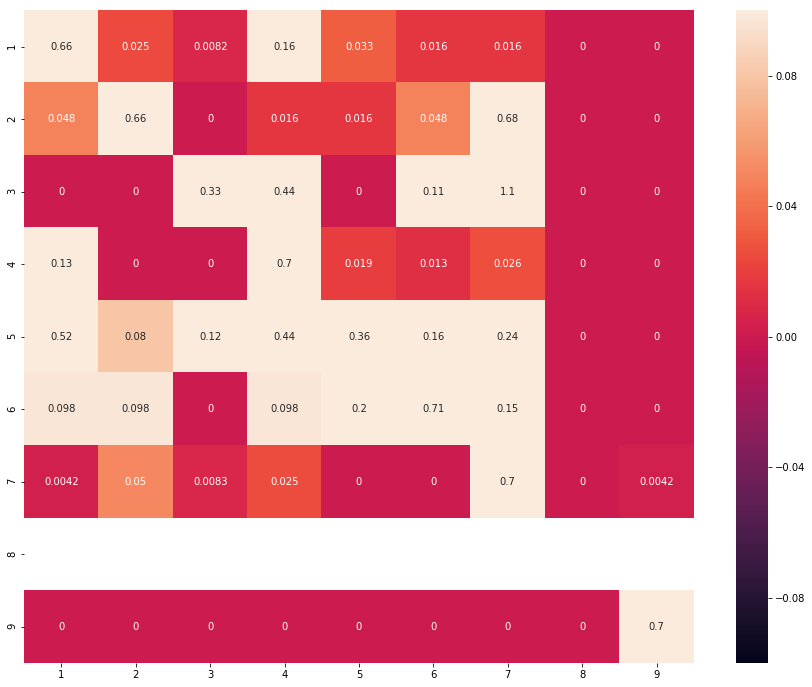

In [106]:
predict_and_plot_confusion_matrix(x_train_ohe, ytrain, x_test_ohe, ytest, 
                                  SGDClassifier(loss= 'log', penalty= 'l2', alpha= alpha[best_alpha], random_state= 42, 
                                                class_weight= 'balanced'))

<h4>4.3.1.3. Feature Importance</h4>

In [108]:
def get_imp_feature_names(text, indices, removed_ind = []):
    word_present = 0
    tabulte_list = []
    incresingorder_ind = 0
    for i in indices:
        if i < gene_train.shape[1]:
            tabulte_list.append([incresingorder_ind, "Gene", "Yes"])
        elif i< 18:
            tabulte_list.append([incresingorder_ind,"Variation", "Yes"])
        if ((i > 17) & (i not in removed_ind)) :
            word = text_train_vocab[i]
            yes_no = True if word in text.split() else False
            if yes_no:
                word_present += 1
            tabulte_list.append([incresingorder_ind,text_train_vocab[i], yes_no])
        incresingorder_ind += 1
    print(word_present, "most important features are present in our query point")
    print("-"*50)
    print("The features that are most important of the ",predicted_cls[0]," class:")
    print (tabulate(tabulte_list, headers=["Index",'Feature name', 'Present or Not']))

<h5>4.3.1.3.1. Correctly Classified point</h5>

In [111]:
test_point_index = 1
no_feature = 500
predicted_cls = cccv.predict(x_test_ohe[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(cccv.predict_proba(x_test_ohe[test_point_index]),4))
print("Actual Class :", ytest[test_point_index])
indices = np.argsort(-sgdc.coef_)[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], x_test['TEXT'].iloc[test_point_index], x_test['Gene'].iloc[test_point_index], 
                     x_test['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 1
Predicted Class Probabilities: [[4.884e-01 4.700e-03 1.000e-03 4.861e-01 3.100e-03 1.600e-03 1.300e-02
  1.800e-03 3.000e-04]]
Actual Class : 1
--------------------------------------------------
146 Text feature [aa] present in test data point [True]
229 Text feature [accumulating] present in test data point [True]
416 Text feature [abnormality] present in test data point [True]
428 Text feature [acceptor] present in test data point [True]
436 Text feature [abrogating] present in test data point [True]
Out of the top  500  features  5 are present in query point


<h5>4.3.1.3.2. Incorrectly Classified point</h5>

In [118]:
test_point_index = 6
no_feature = 100
predicted_cls = cccv.predict(x_test_ohe[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(cccv.predict_proba(x_test_ohe[test_point_index]),4))
print("Actual Class :", ytest[test_point_index])
indices = np.argsort(-sgdc.coef_)[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], x_test['TEXT'].iloc[test_point_index], x_test['Gene'].iloc[test_point_index], 
                     x_test['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 1
Predicted Class Probabilities: [[4.478e-01 8.900e-03 2.100e-03 5.320e-02 2.454e-01 2.049e-01 3.190e-02
  5.700e-03 1.000e-04]]
Actual Class : 5
--------------------------------------------------
Out of the top  100  features  0 are present in query point


<h3>4.3.2. Without Class balancing</h3>

<h4>4.3.2.1. Hyper paramter tuning</h4>

 11%|█         | 1/9 [00:03<00:31,  3.94s/it]

For values of alpha =  1e-06 The log loss is: 1.1086756134013742


 22%|██▏       | 2/9 [00:07<00:26,  3.82s/it]

For values of alpha =  1e-05 The log loss is: 1.1119089114101985


 33%|███▎      | 3/9 [00:10<00:21,  3.56s/it]

For values of alpha =  0.0001 The log loss is: 1.0932040803184244


 44%|████▍     | 4/9 [00:13<00:17,  3.54s/it]

For values of alpha =  0.001 The log loss is: 1.1467219992884568


 56%|█████▌    | 5/9 [00:16<00:13,  3.35s/it]

For values of alpha =  0.01 The log loss is: 1.4504600266775927


 67%|██████▋   | 6/9 [00:19<00:09,  3.19s/it]

For values of alpha =  0.1 The log loss is: 1.9121412785363048


 78%|███████▊  | 7/9 [00:21<00:05,  2.92s/it]

For values of alpha =  1 The log loss is: 1.9731543852550064


 89%|████████▉ | 8/9 [00:24<00:02,  2.67s/it]

For values of alpha =  10 The log loss is: 1.9835919912561724


100%|██████████| 9/9 [00:26<00:00,  2.91s/it]

For values of alpha =  100 The log loss is: 1.984991548844364


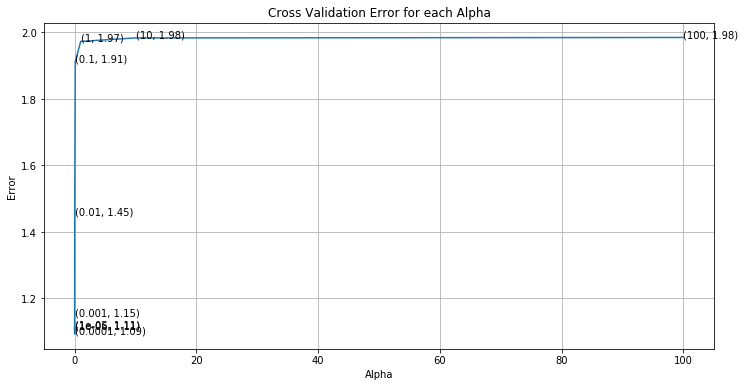

For values of best alpha:  0.0001 The train log loss is:  0.4209160904649432
For values of best alpha:  0.0001 The cv log loss is:  1.0932040803184244
For values of best alpha:  0.0001 The test log loss is:  0.9883086677144824


In [113]:
alpha = [10 ** x for x in range(-6, 3)]

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

# find more about CalibratedClassifierCV here at http://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
# ----------------------------
# default paramters
# sklearn.calibration.CalibratedClassifierCV(base_estimator=None, method=’sigmoid’, cv=3)
#
# some of the methods of CalibratedClassifierCV()
# fit(X, y[, sample_weight])	Fit the calibrated model
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict the target of new samples.
# predict_proba(X)	Posterior probabilities of classification


cv_log_error= []
for i in tqdm(alpha):
    sgdc= SGDClassifier(loss= 'log', penalty= 'l2', alpha= i, random_state= 42)
    sgdc.fit(x_train_ohe, ytrain)
    cccv= CalibratedClassifierCV(base_estimator= sgdc, method= 'sigmoid')
    cccv.fit(x_train_ohe, ytrain)
    y_pred= cccv.predict_proba(x_cv_ohe)
    cv_log_error.append(log_loss(ycv, y_pred, labels= sgdc.classes_, eps = 1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(ycv, y_pred, labels=sgdc.classes_, eps=1e-15))
    
fig, ax= plt.subplots(figsize= (12, 6))
ax.plot(alpha, cv_log_error)
for i, j in enumerate(np.round(cv_log_error, 2)):
    ax.annotate((alpha[i], np.round(j, 2)), (alpha[i], cv_log_error[i]))
plt.title('Cross Validation Error for each Alpha')
plt.xlabel('Alpha')
plt.ylabel('Error')
plt.grid()
plt.show()

best_alpha= np.argmin(cv_log_error)

sgdc= SGDClassifier(loss= 'log', penalty= 'l2', alpha= alpha[best_alpha], random_state= 42)
sgdc.fit(x_train_ohe, ytrain)
cccv= CalibratedClassifierCV(base_estimator= sgdc, method= 'sigmoid')
cccv.fit(x_train_ohe, ytrain)

y_pred= cccv.predict_proba(x_train_ohe)
print('For values of best alpha: ', alpha[best_alpha], "The train log loss is: ", 
      log_loss(ytrain, y_pred, labels= sgdc.classes_, eps = 1e-15))
y_pred= cccv.predict_proba(x_cv_ohe)
print('For values of best alpha: ', alpha[best_alpha], "The cv log loss is: ", 
      log_loss(ycv, y_pred, labels= sgdc.classes_, eps = 1e-15))
y_pred= cccv.predict_proba(x_test_ohe)
print('For values of best alpha: ', alpha[best_alpha], "The test log loss is: ", 
      log_loss(ytest, y_pred, labels= sgdc.classes_, eps = 1e-15))

<h4>4.3.2.2. Testing model with best hyper parameters</h4>

Log loss : 0.9883086677144824
Number of mis-classified points : 0.3328313253012048

*********************************** Confusion Matrix ***********************************


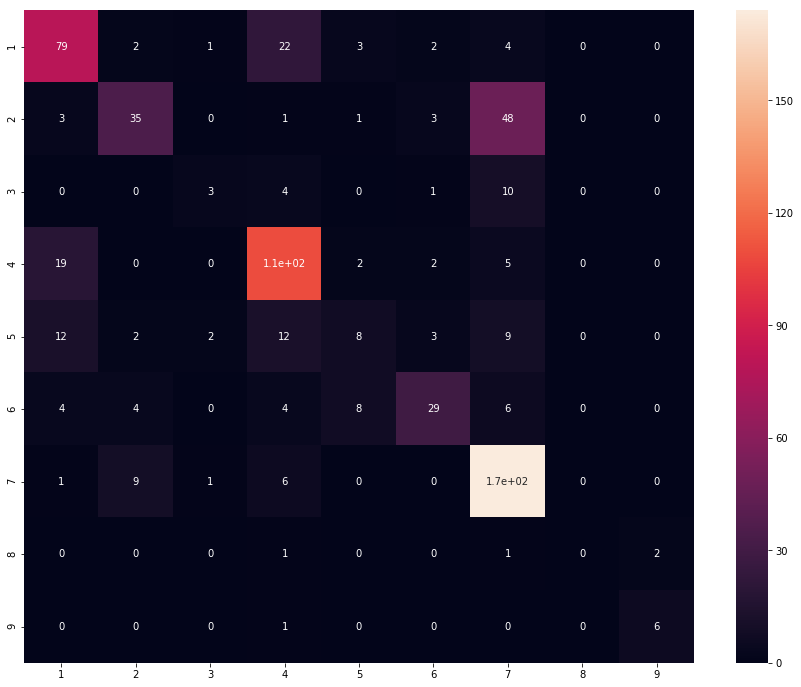

*********************************** Precision Matrix ***********************************


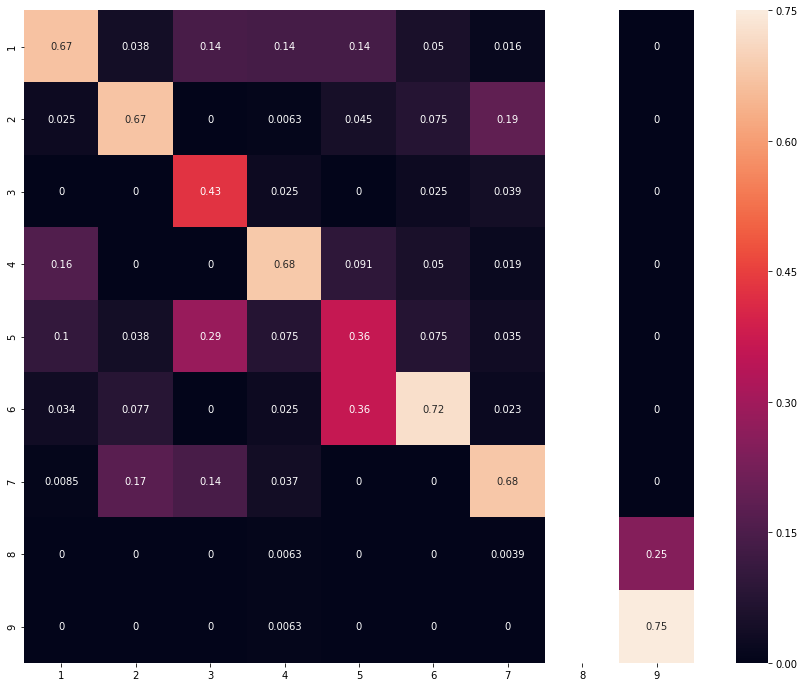

*********************************** Recall Matrix ***********************************


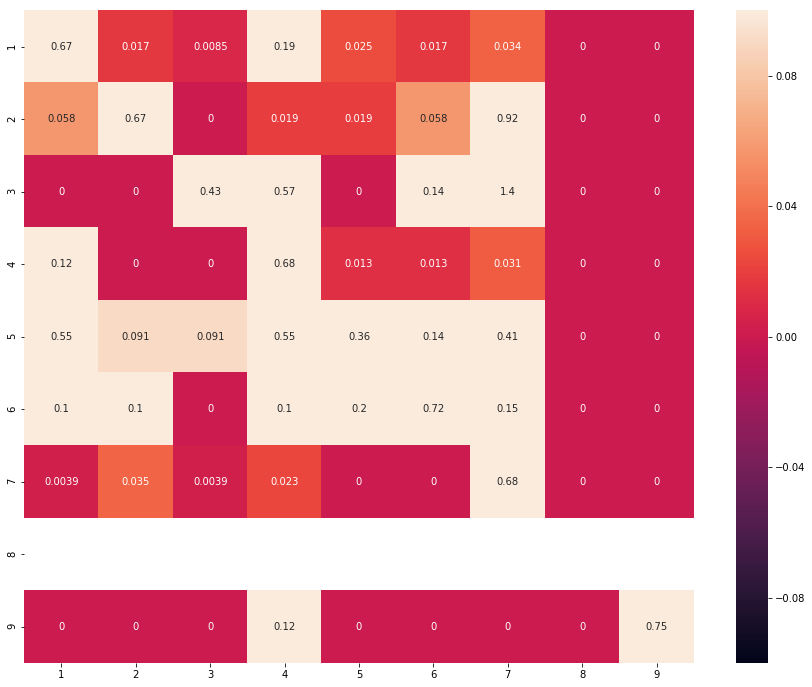

In [114]:
predict_and_plot_confusion_matrix(x_train_ohe, ytrain, x_test_ohe, ytest, 
                                  SGDClassifier(loss= 'log', penalty= 'l2', alpha= alpha[best_alpha], random_state= 42))

<h4>4.3.2.3. Feature Importance, Correctly Classified point</h4>

In [120]:
test_point_index = 2
no_feature = 500
predicted_cls = cccv.predict(x_test_ohe[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(cccv.predict_proba(x_test_ohe[test_point_index]),4))
print("Actual Class :", ytest[test_point_index])
indices = np.argsort(-sgdc.coef_)[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], x_test['TEXT'].iloc[test_point_index], x_test['Gene'].iloc[test_point_index], 
                     x_test['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 6
Predicted Class Probabilities: [[1.040e-02 2.200e-03 1.100e-03 4.400e-03 2.210e-02 9.565e-01 9.000e-04
  2.400e-03 0.000e+00]]
Actual Class : 6
--------------------------------------------------
Out of the top  500  features  0 are present in query point


<h4>4.3.2.4. Feature Importance, Inorrectly Classified point</h4>

In [115]:
test_point_index = 1
no_feature = 500
predicted_cls = cccv.predict(x_test_ohe[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(cccv.predict_proba(x_test_ohe[test_point_index]),4))
print("Actual Class :", ytest[test_point_index])
indices = np.argsort(-sgdc.coef_)[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], x_test['TEXT'].iloc[test_point_index], x_test['Gene'].iloc[test_point_index], 
                     x_test['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 4
Predicted Class Probabilities: [[4.452e-01 4.200e-03 5.000e-04 5.200e-01 2.400e-03 1.100e-03 2.250e-02
  4.100e-03 0.000e+00]]
Actual Class : 1
--------------------------------------------------
242 Text feature [aacr] present in test data point [True]
269 Text feature [achieve] present in test data point [True]
350 Text feature [achieved] present in test data point [True]
444 Text feature [acquisition] present in test data point [True]
Out of the top  500  features  4 are present in query point


<h2>4.4. Linear Support Vector Machines</h2>

<h3>4.4.1. Hyper paramter tuning</h3>

 11%|█         | 1/9 [00:02<00:17,  2.22s/it]

For values of alpha =  1e-06 The log loss is: 1.1228315127012858


 22%|██▏       | 2/9 [00:04<00:15,  2.22s/it]

For values of alpha =  1e-05 The log loss is: 1.114202189579543


 33%|███▎      | 3/9 [00:07<00:14,  2.35s/it]

For values of alpha =  0.0001 The log loss is: 1.0640641026833166


 44%|████▍     | 4/9 [00:10<00:13,  2.71s/it]

For values of alpha =  0.001 The log loss is: 1.0777160973207607


 56%|█████▌    | 5/9 [00:13<00:10,  2.60s/it]

For values of alpha =  0.01 The log loss is: 1.3511606015130861


 67%|██████▋   | 6/9 [00:15<00:07,  2.50s/it]

For values of alpha =  0.1 The log loss is: 1.887003669080445


 78%|███████▊  | 7/9 [00:19<00:06,  3.04s/it]

For values of alpha =  1 The log loss is: 1.843498894331801


 89%|████████▉ | 8/9 [00:21<00:02,  2.77s/it]

For values of alpha =  10 The log loss is: 1.8434971865585768


100%|██████████| 9/9 [00:23<00:00,  2.64s/it]

For values of alpha =  100 The log loss is: 1.8434971632715997


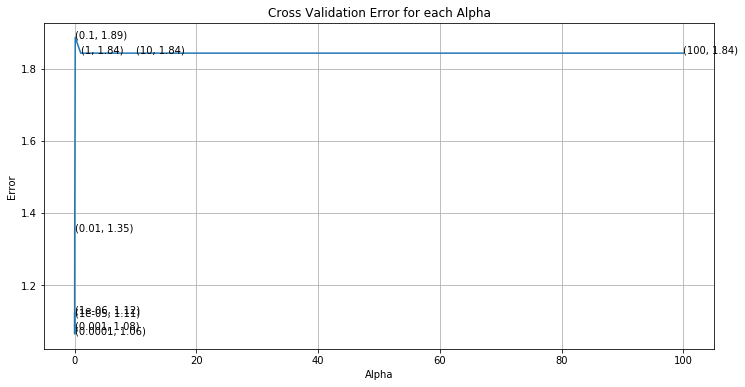

For values of best alpha:  0.0001 The train log loss is:  0.4172309536000051
For values of best alpha:  0.0001 The cv log loss is:  1.0640641026833166
For values of best alpha:  0.0001 The test log loss is:  1.0034688950931545


In [121]:
alpha = [10 ** x for x in range(-6, 3)]

# read more about support vector machines with linear kernals here http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
# --------------------------------
# default parameters 
# SVC(C=1.0, kernel=’rbf’, degree=3, gamma=’auto’, coef0=0.0, shrinking=True, probability=False, tol=0.001, 
# cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape=’ovr’, random_state=None)
# Some of methods of SVM()
# fit(X, y, [sample_weight])	Fit the SVM model according to the given training data.
# predict(X)	Perform classification on samples in X.


# find more about CalibratedClassifierCV here at http://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
# ----------------------------
# default paramters
# sklearn.calibration.CalibratedClassifierCV(base_estimator=None, method=’sigmoid’, cv=3)
# ----------------------------
# some of the methods of CalibratedClassifierCV()
# fit(X, y[, sample_weight])	Fit the calibrated model
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict the target of new samples.
# predict_proba(X)	Posterior probabilities of classification


cv_log_error= []
for i in tqdm(alpha):
    sgdc= SGDClassifier(loss= 'hinge', penalty= 'l2', alpha= i, random_state= 42, class_weight= 'balanced')
    sgdc.fit(x_train_ohe, ytrain)
    cccv= CalibratedClassifierCV(base_estimator= sgdc, method= 'sigmoid')
    cccv.fit(x_train_ohe, ytrain)
    y_pred= cccv.predict_proba(x_cv_ohe)
    cv_log_error.append(log_loss(ycv, y_pred, labels= sgdc.classes_, eps = 1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(ycv, y_pred, labels=sgdc.classes_, eps=1e-15))
    
fig, ax= plt.subplots(figsize= (12, 6))
ax.plot(alpha, cv_log_error)
for i, j in enumerate(np.round(cv_log_error, 2)):
    ax.annotate((alpha[i], np.round(j, 2)), (alpha[i], cv_log_error[i]))
plt.title('Cross Validation Error for each Alpha')
plt.xlabel('Alpha')
plt.ylabel('Error')
plt.grid()
plt.show()

best_alpha= np.argmin(cv_log_error)

sgdc= SGDClassifier(loss= 'hinge', penalty= 'l2', alpha= alpha[best_alpha], random_state= 42, class_weight= 'balanced')
sgdc.fit(x_train_ohe, ytrain)
cccv= CalibratedClassifierCV(base_estimator= sgdc, method= 'sigmoid')
cccv.fit(x_train_ohe, ytrain)

y_pred= cccv.predict_proba(x_train_ohe)
print('For values of best alpha: ', alpha[best_alpha], "The train log loss is: ", 
      log_loss(ytrain, y_pred, labels= sgdc.classes_, eps = 1e-15))
y_pred= cccv.predict_proba(x_cv_ohe)
print('For values of best alpha: ', alpha[best_alpha], "The cv log loss is: ", 
      log_loss(ycv, y_pred, labels= sgdc.classes_, eps = 1e-15))
y_pred= cccv.predict_proba(x_test_ohe)
print('For values of best alpha: ', alpha[best_alpha], "The test log loss is: ", 
      log_loss(ytest, y_pred, labels= sgdc.classes_, eps = 1e-15))

<h3>4.4.2. Testing model with best hyper parameters</h3>

Log loss : 1.0034688950931545
Number of mis-classified points : 0.33433734939759036

*********************************** Confusion Matrix ***********************************


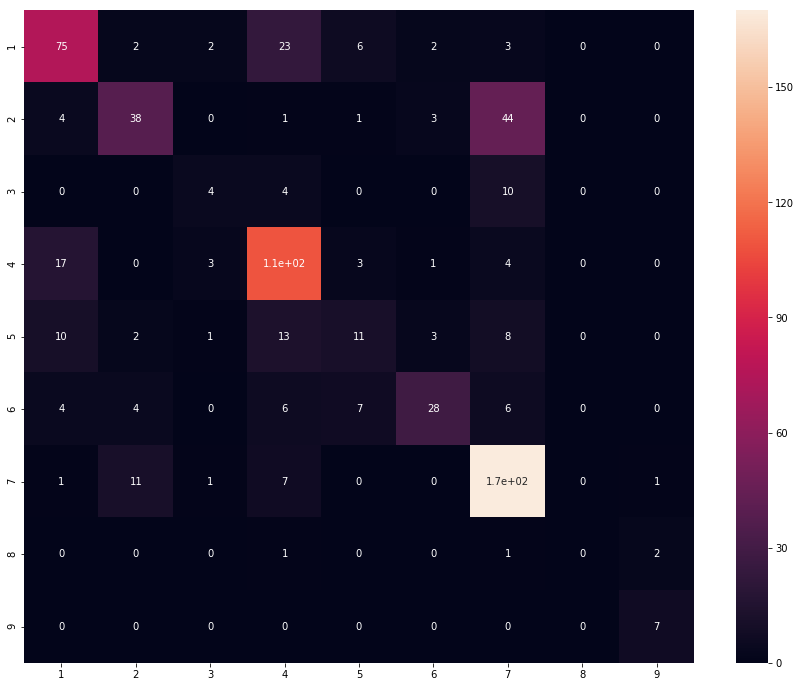

*********************************** Precision Matrix ***********************************


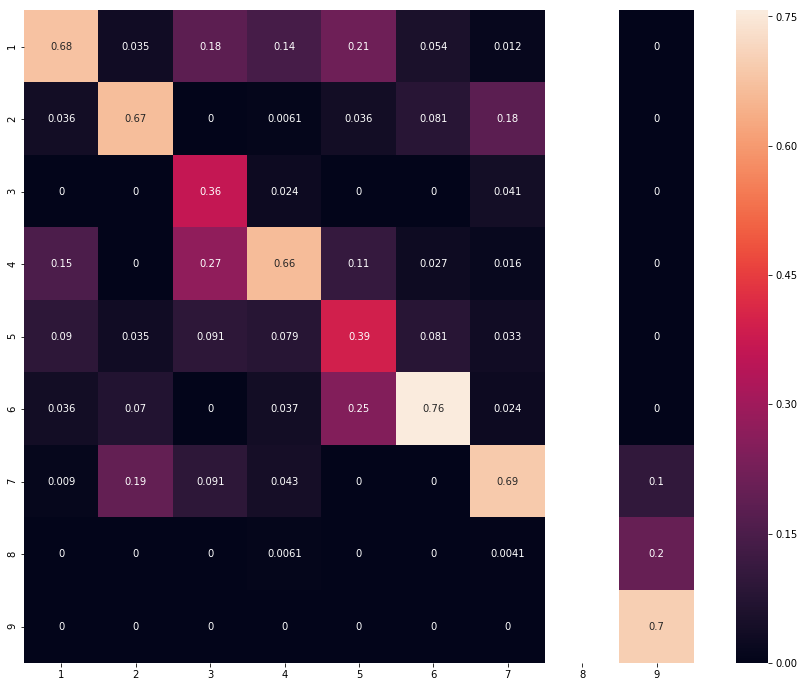

*********************************** Recall Matrix ***********************************


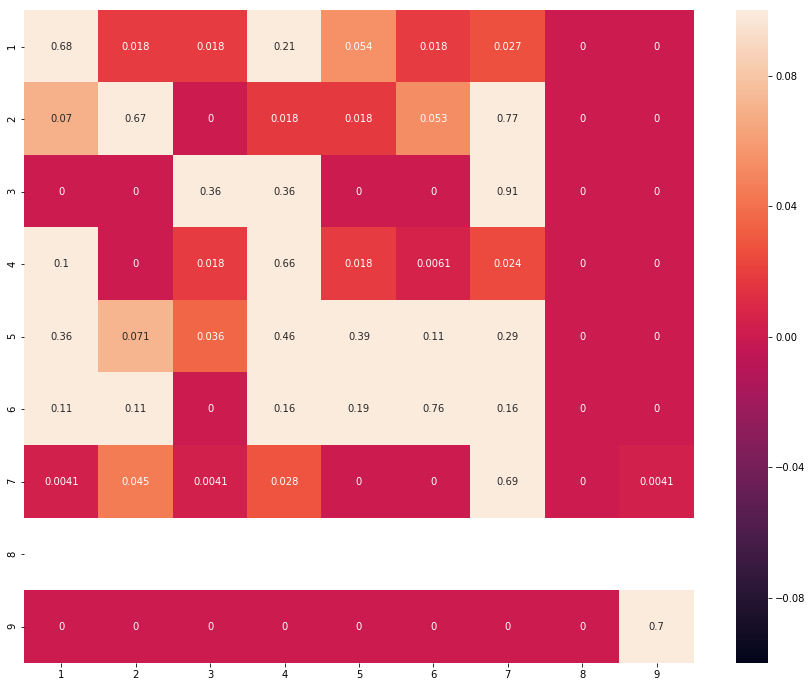

In [122]:
predict_and_plot_confusion_matrix(x_train_ohe, ytrain, x_test_ohe, ytest, 
                                  SGDClassifier(loss= 'hinge', penalty= 'l2', alpha= alpha[best_alpha], random_state= 42, 
                                                class_weight= 'balanced'))

<h3>4.3.3. Feature Importance</h3>

<h4>4.3.3.1. For Correctly classified point</h4>

In [124]:
test_point_index = 2
no_feature = 500
predicted_cls = cccv.predict(x_test_ohe[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(cccv.predict_proba(x_test_ohe[test_point_index]),4))
print("Actual Class :", ytest[test_point_index])
indices = np.argsort(-sgdc.coef_)[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], x_test['TEXT'].iloc[test_point_index], x_test['Gene'].iloc[test_point_index], 
                     x_test['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 6
Predicted Class Probabilities: [[1.860e-02 2.550e-02 1.050e-02 1.210e-02 3.430e-02 8.862e-01 1.180e-02
  9.000e-04 2.000e-04]]
Actual Class : 6
--------------------------------------------------
Out of the top  500  features  0 are present in query point


<h4>4.3.3.2. For Incorrectly classified point</h4>

In [123]:
test_point_index = 1
no_feature = 500
predicted_cls = cccv.predict(x_test_ohe[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(cccv.predict_proba(x_test_ohe[test_point_index]),4))
print("Actual Class :", ytest[test_point_index])
indices = np.argsort(-sgdc.coef_)[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], x_test['TEXT'].iloc[test_point_index], x_test['Gene'].iloc[test_point_index], 
                     x_test['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 4
Predicted Class Probabilities: [[0.4401 0.0078 0.0034 0.4652 0.0055 0.0043 0.0718 0.0014 0.0005]]
Actual Class : 1
--------------------------------------------------
263 Text feature [aacr] present in test data point [True]
308 Text feature [achieve] present in test data point [True]
345 Text feature [achieved] present in test data point [True]
473 Text feature [acquisition] present in test data point [True]
Out of the top  500  features  4 are present in query point


<h2>4.5 Random Forest Classifier</h2>

<h3>4.5.1. Hyper paramter tuning (With One hot Encoding)</h3>


  0%|          | 0/7 [00:00<?, ?it/s]

for n_estimators = 5 and max depth =  2
The log loss is: 1.6532590426959284
for n_estimators = 5 and max depth =  3
The log loss is: 1.7024324731485772
for n_estimators = 5 and max depth =  4
The log loss is: 1.6168201016675112
for n_estimators = 5 and max depth =  5
The log loss is: 1.5923146605419267
for n_estimators = 5 and max depth =  6
The log loss is: 1.5924207515324822
for n_estimators = 5 and max depth =  7
The log loss is: 1.5650965310215212
for n_estimators = 5 and max depth =  8
The log loss is: 1.57202193787134
for n_estimators = 5 and max depth =  9
The log loss is: 1.533064344544194
for n_estimators = 5 and max depth =  10



 14%|█▍        | 1/7 [00:15<01:33, 15.59s/it]

The log loss is: 1.518216158359641
for n_estimators = 10 and max depth =  2
The log loss is: 1.6746876783568574
for n_estimators = 10 and max depth =  3
The log loss is: 1.6355042118259684
for n_estimators = 10 and max depth =  4
The log loss is: 1.5299569520798
for n_estimators = 10 and max depth =  5
The log loss is: 1.4970077141719476
for n_estimators = 10 and max depth =  6
The log loss is: 1.5364469378279266
for n_estimators = 10 and max depth =  7
The log loss is: 1.4520270265832405
for n_estimators = 10 and max depth =  8
The log loss is: 1.495793371465223
for n_estimators = 10 and max depth =  9
The log loss is: 1.4559955059975098
for n_estimators = 10 and max depth =  10



 29%|██▊       | 2/7 [00:31<01:18, 15.78s/it]

The log loss is: 1.4485795725227237
for n_estimators = 50 and max depth =  2
The log loss is: 1.586335654163959
for n_estimators = 50 and max depth =  3
The log loss is: 1.4913445840497017
for n_estimators = 50 and max depth =  4
The log loss is: 1.3804929440597953
for n_estimators = 50 and max depth =  5
The log loss is: 1.3456577799484357
for n_estimators = 50 and max depth =  6
The log loss is: 1.3210834187767293
for n_estimators = 50 and max depth =  7
The log loss is: 1.2869074371796183
for n_estimators = 50 and max depth =  8
The log loss is: 1.304043087997293
for n_estimators = 50 and max depth =  9
The log loss is: 1.2977394021121171
for n_estimators = 50 and max depth =  10



 43%|████▎     | 3/7 [00:55<01:12, 18.04s/it]

The log loss is: 1.297372800108202
for n_estimators = 100 and max depth =  2
The log loss is: 1.569958404241197
for n_estimators = 100 and max depth =  3
The log loss is: 1.434827823966733
for n_estimators = 100 and max depth =  4
The log loss is: 1.3348526262552332
for n_estimators = 100 and max depth =  5
The log loss is: 1.2901142248046173
for n_estimators = 100 and max depth =  6
The log loss is: 1.281654537517901
for n_estimators = 100 and max depth =  7
The log loss is: 1.2687318808034733
for n_estimators = 100 and max depth =  8
The log loss is: 1.2685350133395734
for n_estimators = 100 and max depth =  9
The log loss is: 1.265500011690373
for n_estimators = 100 and max depth =  10



 57%|█████▋    | 4/7 [01:27<01:07, 22.47s/it]

The log loss is: 1.2645856171067396
for n_estimators = 200 and max depth =  2
The log loss is: 1.5860971483834916
for n_estimators = 200 and max depth =  3
The log loss is: 1.415552128499012
for n_estimators = 200 and max depth =  4
The log loss is: 1.301802730153224
for n_estimators = 200 and max depth =  5
The log loss is: 1.2639179305430421
for n_estimators = 200 and max depth =  6
The log loss is: 1.2488662974867188
for n_estimators = 200 and max depth =  7
The log loss is: 1.2476253465071725
for n_estimators = 200 and max depth =  8
The log loss is: 1.2408039547531056
for n_estimators = 200 and max depth =  9
The log loss is: 1.2505840662459795
for n_estimators = 200 and max depth =  10



 71%|███████▏  | 5/7 [02:23<01:04, 32.46s/it]

The log loss is: 1.249343568190606
for n_estimators = 500 and max depth =  2
The log loss is: 1.5592113628091278
for n_estimators = 500 and max depth =  3
The log loss is: 1.3813075754266608
for n_estimators = 500 and max depth =  4
The log loss is: 1.2906400317335875
for n_estimators = 500 and max depth =  5
The log loss is: 1.2432512868019865
for n_estimators = 500 and max depth =  6
The log loss is: 1.219657740672712
for n_estimators = 500 and max depth =  7
The log loss is: 1.220836852447544
for n_estimators = 500 and max depth =  8
The log loss is: 1.2282179493815653
for n_estimators = 500 and max depth =  9
The log loss is: 1.236736239927468
for n_estimators = 500 and max depth =  10



 86%|████████▌ | 6/7 [04:19<00:57, 57.54s/it]

The log loss is: 1.2447742967599096
for n_estimators = 1000 and max depth =  2
The log loss is: 1.5675951655101716
for n_estimators = 1000 and max depth =  3
The log loss is: 1.379335551981137
for n_estimators = 1000 and max depth =  4
The log loss is: 1.272203158681552
for n_estimators = 1000 and max depth =  5
The log loss is: 1.2275240745292146
for n_estimators = 1000 and max depth =  6
The log loss is: 1.2179432977743707
for n_estimators = 1000 and max depth =  7
The log loss is: 1.215371695870668
for n_estimators = 1000 and max depth =  8
The log loss is: 1.2286266765279812
for n_estimators = 1000 and max depth =  9
The log loss is: 1.2361370379701275
for n_estimators = 1000 and max depth =  10



100%|██████████| 7/7 [08:01<00:00, 68.84s/it] 

The log loss is: 1.2309337296097695


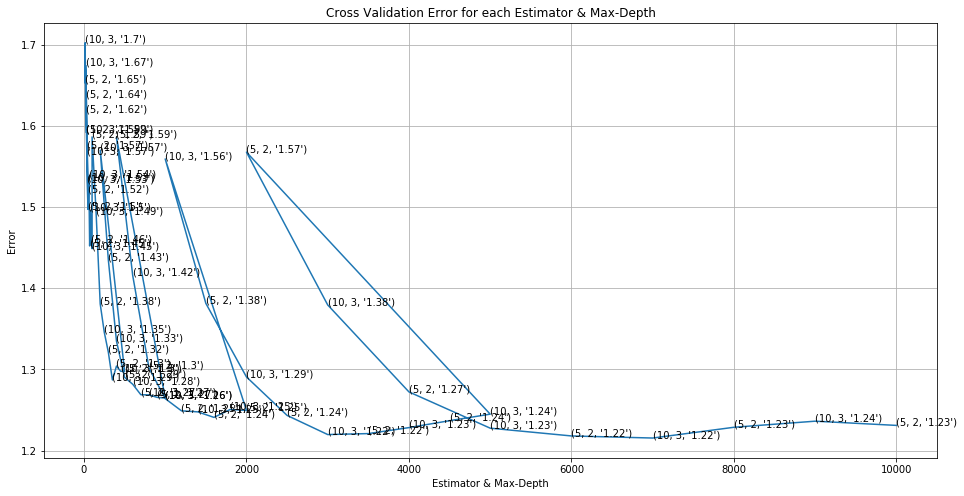

For values of best estimator:  1000 and max depth: 8 The train log loss is:  0.6814210321783863
For values of best estimator:  1000 and max depth: 8 The cv log loss is:  1.2272932933700114
For values of best estimator:  1000 and max depth: 8 The test log loss is:  1.1587232861668606


In [178]:
# --------------------------------
# default parameters 
# sklearn.ensemble.RandomForestClassifier(n_estimators=10, criterion=’gini’, max_depth=None, min_samples_split=2, 
# min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=’auto’, max_leaf_nodes=None, min_impurity_decrease=0.0, 
# min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, warm_start=False, 
# class_weight=None)
# Some of methods of RandomForestClassifier()
# fit(X, y, [sample_weight])	Fit the SVM model according to the given training data.
# predict(X)	Perform classification on samples in X.
# predict_proba (X)	Perform classification on samples in X.
# some of attributes of  RandomForestClassifier()
# feature_importances_ : array of shape = [n_features]
# The feature importances (the higher, the more important the feature).


# find more about CalibratedClassifierCV here at http://scikit-learn.org/stable/modules/generated/
#sklearn.calibration.CalibratedClassifierCV.html
# ----------------------------
# default paramters
# sklearn.calibration.CalibratedClassifierCV(base_estimator=None, method=’sigmoid’, cv=3)
# ----------------------------
# some of the methods of CalibratedClassifierCV()
# fit(X, y[, sample_weight])	Fit the calibrated model
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict the target of new samples.
# predict_proba(X)	Posterior probabilities of classification

estimator= [5, 10, 50, 100, 200, 500, 1000]
max_depth= [2,3,4,5,6,7,8,9,10]
cv_log_error= []
for i in tqdm(estimator):
    for j in max_depth:
        print("for n_estimators =", i,"and max depth = ", j)
        rfc= RandomForestClassifier(n_estimators= i, max_depth= j, class_weight= 'balanced', n_jobs= -1)
        rfc.fit(x_train_ohe, ytrain)
        cccv= CalibratedClassifierCV(base_estimator= rfc, method= 'sigmoid')
        cccv.fit(x_train_ohe, ytrain)
        y_pred= cccv.predict_proba(x_cv_ohe)
        cv_log_error.append(log_loss(ycv, y_pred, labels= rfc.classes_, eps = 1e-15))
        print("The log loss is:",log_loss(ycv, y_pred, labels= rfc.classes_, eps=1e-15))
        
fig, ax= plt.subplots(figsize= (16, 8))
features = np.dot(np.array(estimator)[:,None],np.array(max_depth)[None]).ravel()
ax.plot(features, cv_log_error)
for i, j in enumerate(np.round(cv_log_error, 2)):
    ax.annotate((estimator[int(i%2)],max_depth[int(i%2)],str(j)), (features[i], cv_log_error[i]))
plt.title('Cross Validation Error for each Estimator & Max-Depth')
plt.xlabel('Estimator & Max-Depth')
plt.ylabel('Error')
plt.grid()
plt.show()
    
best_est_md= np.argmin(cv_log_error)
# The estimator is 1000 and max_depth is 8 - are considered by best_est_md

rfc= RandomForestClassifier(n_estimators= 1000, max_depth= 8,
                             random_state=42, n_jobs=-1, class_weight= 'balanced')
rfc.fit(x_train_ohe, ytrain)
cccv= CalibratedClassifierCV(base_estimator= rfc, method= 'sigmoid')
cccv.fit(x_train_ohe, ytrain)

y_pred= cccv.predict_proba(x_train_ohe)
print('For values of best estimator: ', 1000, 'and max depth:', 8, 
      "The train log loss is: ", log_loss(ytrain, y_pred, labels= rfc.classes_, eps = 1e-15))
y_pred= cccv.predict_proba(x_cv_ohe)
print('For values of best estimator: ', 1000, 'and max depth:', 8, 
      "The cv log loss is: ", log_loss(ycv, y_pred, labels= rfc.classes_, eps = 1e-15))
y_pred= cccv.predict_proba(x_test_ohe)
print('For values of best estimator: ', 1000, 'and max depth:', 8, 
      "The test log loss is: ", log_loss(ytest, y_pred, labels= rfc.classes_, eps = 1e-15))

<h3>4.5.2. Testing model with best hyper parameters (One Hot Encoding)</h3>

Log loss : 1.1587232861668606
Number of mis-classified points : 0.37198795180722893

*********************************** Confusion Matrix ***********************************


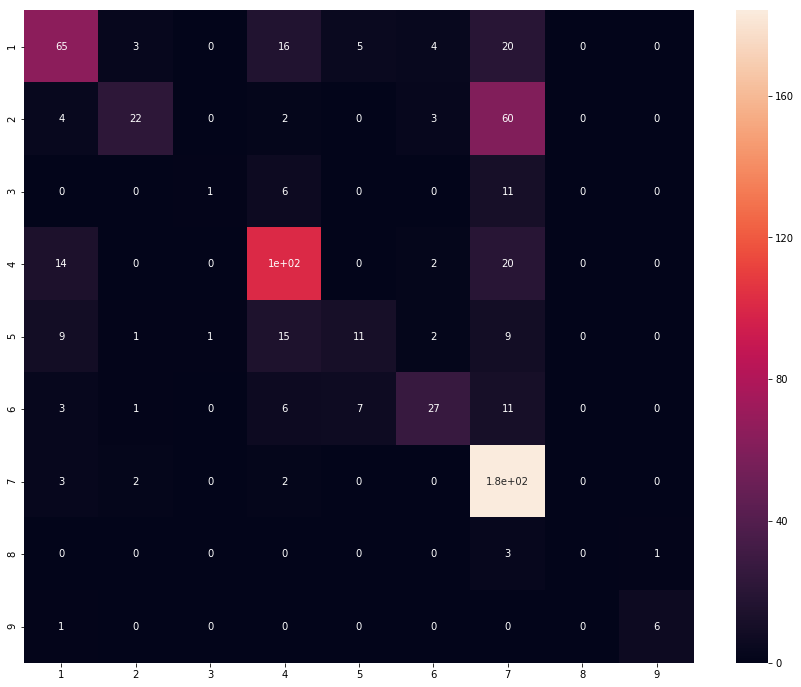

*********************************** Precision Matrix ***********************************


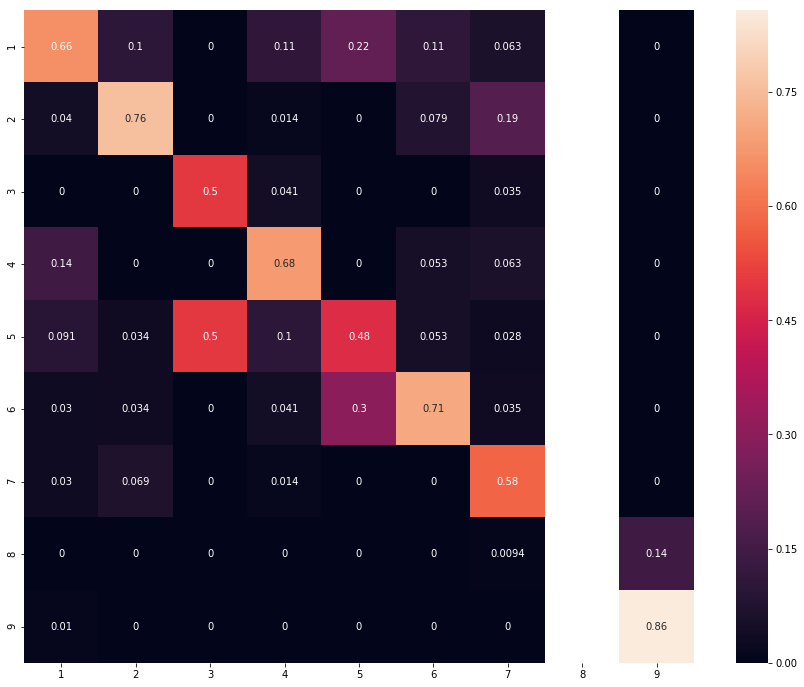

*********************************** Recall Matrix ***********************************


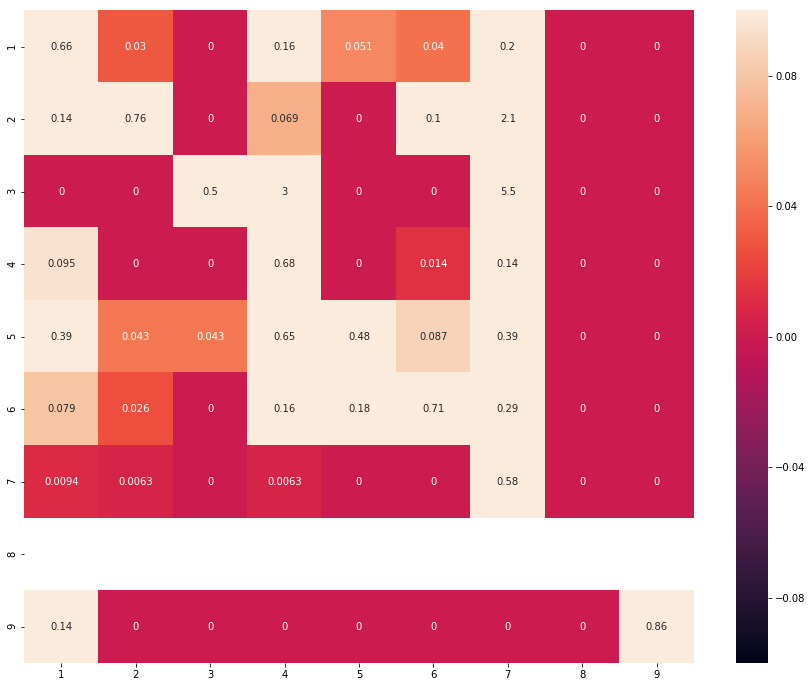

In [179]:
predict_and_plot_confusion_matrix(x_train_ohe, ytrain, x_test_ohe, ytest, 
                                  RandomForestClassifier(n_estimators= 1000, max_depth= 8, random_state=42, n_jobs=-1, 
                                                         class_weight= 'balanced'))

<h3>4.5.3. Feature Importance</h3>

<h4>4.5.3.1. Correctly Classified point</h4>

In [181]:
test_point_index = 1
no_feature = 500
predicted_cls = cccv.predict(x_test_ohe[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(cccv.predict_proba(x_test_ohe[test_point_index]),4))
print("Actual Class :", ytest[test_point_index])
indices = np.argsort(-rfc.feature_importances_)
print("-"*50)
get_impfeature_names(indices[:no_feature], x_test['TEXT'].iloc[test_point_index], x_test['Gene'].iloc[test_point_index], 
                     x_test['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 1
Predicted Class Probabilities: [[0.3244 0.1035 0.0185 0.1287 0.0464 0.0376 0.3195 0.0074 0.014 ]]
Actual Class : 1
--------------------------------------------------
10 Text feature [absolute] present in test data point [True]
82 Text feature [acids] present in test data point [True]
108 Text feature [acetylation] present in test data point [True]
128 Text feature [aag] present in test data point [True]
274 Text feature [achieved] present in test data point [True]
292 Text feature [abundantly] present in test data point [True]
296 Text feature [able] present in test data point [True]
322 Text feature [absent] present in test data point [True]
333 Text feature [accomplish] present in test data point [True]
359 Text feature [ablating] present in test data point [True]
392 Text feature [accession] present in test data point [True]
Out of the top  500  features  11 are present in query point


<h4>4.5.3.2. Inorrectly Classified point</h4>

In [182]:
test_point_index = 5
no_feature = 500
predicted_cls = cccv.predict(x_test_ohe[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(cccv.predict_proba(x_test_ohe[test_point_index]),4))
print("Actual Class :", ytest[test_point_index])
indices = np.argsort(-rfc.feature_importances_)
print("-"*50)
get_impfeature_names(indices[:no_feature], x_test['TEXT'].iloc[test_point_index], x_test['Gene'].iloc[test_point_index], 
                     x_test['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 7
Predicted Class Probabilities: [[0.165  0.096  0.025  0.1524 0.0768 0.1005 0.3592 0.0101 0.0148]]
Actual Class : 6
--------------------------------------------------
82 Text feature [acids] present in test data point [True]
296 Text feature [able] present in test data point [True]
392 Text feature [accession] present in test data point [True]
Out of the top  500  features  3 are present in query point


<h3>4.5.3. Hyper paramter tuning (With Response Coding)</h3>


  0%|          | 0/7 [00:00<?, ?it/s]

for n_estimators = 5 and max depth =  2
The log loss is: 2.570237751231094
for n_estimators = 5 and max depth =  3
The log loss is: 1.5764953316877688
for n_estimators = 5 and max depth =  4
The log loss is: 1.7390474524163846
for n_estimators = 5 and max depth =  5
The log loss is: 1.590246210712659
for n_estimators = 5 and max depth =  6
The log loss is: 1.28489513290464
for n_estimators = 5 and max depth =  7
The log loss is: 1.3929272281399132
for n_estimators = 5 and max depth =  8
The log loss is: 1.4700801583885674
for n_estimators = 5 and max depth =  9
The log loss is: 1.5734689469723584
for n_estimators = 5 and max depth =  10



 14%|█▍        | 1/7 [00:10<01:03, 10.58s/it]

The log loss is: 1.6389494770611337
for n_estimators = 10 and max depth =  2
The log loss is: 2.1589292437782825
for n_estimators = 10 and max depth =  3
The log loss is: 1.456136978141318
for n_estimators = 10 and max depth =  4
The log loss is: 1.5325524311132541
for n_estimators = 10 and max depth =  5
The log loss is: 1.6411553943450694
for n_estimators = 10 and max depth =  6
The log loss is: 1.480708829964889
for n_estimators = 10 and max depth =  7
The log loss is: 1.5576904983950488
for n_estimators = 10 and max depth =  8
The log loss is: 1.532481844391208
for n_estimators = 10 and max depth =  9
The log loss is: 1.623420686122857
for n_estimators = 10 and max depth =  10



 29%|██▊       | 2/7 [00:21<00:53, 10.61s/it]

The log loss is: 1.4532540219034045
for n_estimators = 50 and max depth =  2
The log loss is: 1.669152570592556
for n_estimators = 50 and max depth =  3
The log loss is: 1.4639639572160925
for n_estimators = 50 and max depth =  4
The log loss is: 1.483849135000074
for n_estimators = 50 and max depth =  5
The log loss is: 1.3771960015087057
for n_estimators = 50 and max depth =  6
The log loss is: 1.3553983419597315
for n_estimators = 50 and max depth =  7
The log loss is: 1.27556031948962
for n_estimators = 50 and max depth =  8
The log loss is: 1.2669286688700578
for n_estimators = 50 and max depth =  9
The log loss is: 1.3098179481396537
for n_estimators = 50 and max depth =  10



 43%|████▎     | 3/7 [00:36<00:47, 11.92s/it]

The log loss is: 1.348374515744617
for n_estimators = 100 and max depth =  2
The log loss is: 1.6295100662814845
for n_estimators = 100 and max depth =  3
The log loss is: 1.5479972415363537
for n_estimators = 100 and max depth =  4
The log loss is: 1.5414484454896602
for n_estimators = 100 and max depth =  5
The log loss is: 1.3365767154044572
for n_estimators = 100 and max depth =  6
The log loss is: 1.3266748329356315
for n_estimators = 100 and max depth =  7
The log loss is: 1.2871397032655487
for n_estimators = 100 and max depth =  8
The log loss is: 1.2515704802423175
for n_estimators = 100 and max depth =  9
The log loss is: 1.368829840033529
for n_estimators = 100 and max depth =  10



 57%|█████▋    | 4/7 [00:55<00:42, 14.14s/it]

The log loss is: 1.4059366359139431
for n_estimators = 200 and max depth =  2
The log loss is: 1.6218228482382984
for n_estimators = 200 and max depth =  3
The log loss is: 1.5800050013302345
for n_estimators = 200 and max depth =  4
The log loss is: 1.4890439072142823
for n_estimators = 200 and max depth =  5
The log loss is: 1.390781406563427
for n_estimators = 200 and max depth =  6
The log loss is: 1.3335642368486251
for n_estimators = 200 and max depth =  7
The log loss is: 1.3021071931394235
for n_estimators = 200 and max depth =  8
The log loss is: 1.3055869950994905
for n_estimators = 200 and max depth =  9
The log loss is: 1.3191707943149227
for n_estimators = 200 and max depth =  10



 71%|███████▏  | 5/7 [01:23<00:36, 18.33s/it]

The log loss is: 1.373615194045296
for n_estimators = 500 and max depth =  2
The log loss is: 1.663289084688107
for n_estimators = 500 and max depth =  3
The log loss is: 1.5644972765662923
for n_estimators = 500 and max depth =  4
The log loss is: 1.4312743205854528
for n_estimators = 500 and max depth =  5
The log loss is: 1.3672502151869412
for n_estimators = 500 and max depth =  6
The log loss is: 1.2941747694939811
for n_estimators = 500 and max depth =  7
The log loss is: 1.2776740059811562
for n_estimators = 500 and max depth =  8
The log loss is: 1.2869538785268353
for n_estimators = 500 and max depth =  9
The log loss is: 1.2966472020975057
for n_estimators = 500 and max depth =  10



 86%|████████▌ | 6/7 [02:32<00:33, 33.55s/it]

The log loss is: 1.3729183259687439
for n_estimators = 1000 and max depth =  2
The log loss is: 1.6499914697257743
for n_estimators = 1000 and max depth =  3
The log loss is: 1.5334950791183457
for n_estimators = 1000 and max depth =  4
The log loss is: 1.4812768486316281
for n_estimators = 1000 and max depth =  5
The log loss is: 1.3717187093231626
for n_estimators = 1000 and max depth =  6
The log loss is: 1.298781206552123
for n_estimators = 1000 and max depth =  7
The log loss is: 1.2751339205375567
for n_estimators = 1000 and max depth =  8
The log loss is: 1.2554778238823352
for n_estimators = 1000 and max depth =  9
The log loss is: 1.313291360964601
for n_estimators = 1000 and max depth =  10



100%|██████████| 7/7 [04:48<00:00, 41.24s/it]

The log loss is: 1.360477697387301


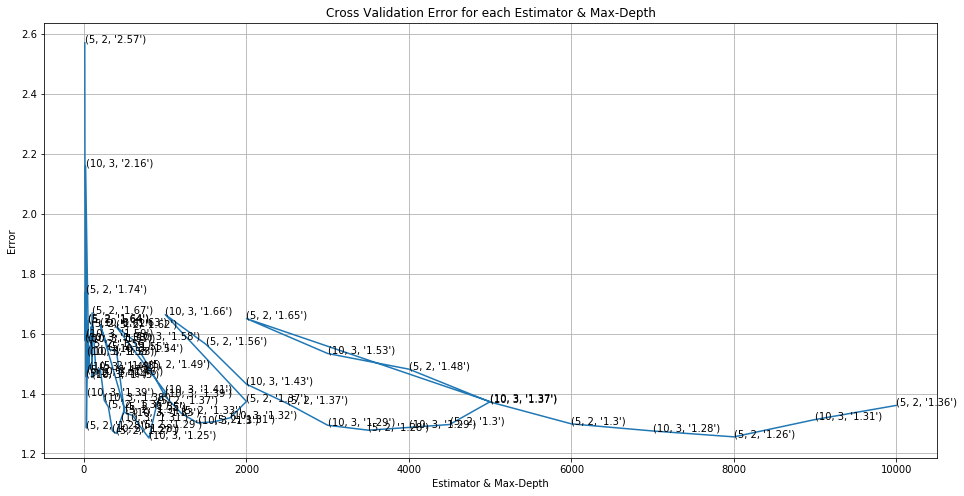

For values of best estimator:  200 and max depth: 8 The train log loss is:  0.033930165949889755
For values of best estimator:  200 and max depth: 8 The cv log loss is:  1.3017712074997825
For values of best estimator:  200 and max depth: 8 The test log loss is:  1.284718032055703


In [183]:
# --------------------------------
# default parameters 
# sklearn.ensemble.RandomForestClassifier(n_estimators=10, criterion=’gini’, max_depth=None, min_samples_split=2, 
# min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=’auto’, max_leaf_nodes=None, min_impurity_decrease=0.0, 
# min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, warm_start=False, 
# class_weight=None)
# Some of methods of RandomForestClassifier()
# fit(X, y, [sample_weight])	Fit the SVM model according to the given training data.
# predict(X)	Perform classification on samples in X.
# predict_proba (X)	Perform classification on samples in X.
# some of attributes of  RandomForestClassifier()
# feature_importances_ : array of shape = [n_features]
# The feature importances (the higher, the more important the feature).


# find more about CalibratedClassifierCV here at http://scikit-learn.org/stable/modules/generated/
#sklearn.calibration.CalibratedClassifierCV.html
# ----------------------------
# default paramters
# sklearn.calibration.CalibratedClassifierCV(base_estimator=None, method=’sigmoid’, cv=3)
# ----------------------------
# some of the methods of CalibratedClassifierCV()
# fit(X, y[, sample_weight])	Fit the calibrated model
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict the target of new samples.
# predict_proba(X)	Posterior probabilities of classification

estimator= [5, 10, 50, 100, 200, 500, 1000]
max_depth= [2,3,4,5,6,7,8,9,10]
cv_log_error= []
for i in tqdm(estimator):
    for j in max_depth:
        print("for n_estimators =", i,"and max depth = ", j)
        rfc= RandomForestClassifier(n_estimators= i, max_depth= j, class_weight= 'balanced', n_jobs= -1)
        rfc.fit(x_train_rc, ytrain)
        cccv= CalibratedClassifierCV(base_estimator= rfc, method= 'sigmoid')
        cccv.fit(x_train_rc, ytrain)
        y_pred= cccv.predict_proba(x_cv_rc)
        cv_log_error.append(log_loss(ycv, y_pred, labels= rfc.classes_, eps = 1e-15))
        print("The log loss is:",log_loss(ycv, y_pred, labels= rfc.classes_, eps=1e-15))
        
fig, ax= plt.subplots(figsize= (16, 8))
features = np.dot(np.array(estimator)[:,None],np.array(max_depth)[None]).ravel()
ax.plot(features, cv_log_error)
for i, j in enumerate(np.round(cv_log_error, 2)):
    ax.annotate((estimator[int(i%2)],max_depth[int(i%2)],str(j)), (features[i], cv_log_error[i]))
plt.title('Cross Validation Error for each Estimator & Max-Depth')
plt.xlabel('Estimator & Max-Depth')
plt.ylabel('Error')
plt.grid()
plt.show()
    
best_est_md= np.argmin(cv_log_error)
# The estimator is 200 and max_depth is 8 --> are considered by best_est_md

rfc= RandomForestClassifier(n_estimators=200 , max_depth= 8, 
                             random_state=42, n_jobs=-1, class_weight= 'balanced')
rfc.fit(x_train_rc, ytrain)
cccv= CalibratedClassifierCV(base_estimator= rfc, method= 'sigmoid')
cccv.fit(x_train_rc, ytrain)

y_pred= cccv.predict_proba(x_train_rc)
print('For values of best estimator: ', 200, 'and max depth:', 8, 
      "The train log loss is: ", log_loss(ytrain, y_pred, labels= rfc.classes_, eps = 1e-15))
y_pred= cccv.predict_proba(x_cv_rc)
print('For values of best estimator: ', 200, 'and max depth:', 8, 
      "The cv log loss is: ", log_loss(ycv, y_pred, labels= rfc.classes_, eps = 1e-15))
y_pred= cccv.predict_proba(x_test_rc)
print('For values of best estimator: ', 200, 'and max depth:', 8, 
      "The test log loss is: ", log_loss(ytest, y_pred, labels= rfc.classes_, eps = 1e-15))

<h3>4.5.4. Testing model with best hyper parameters (Response Coding)</h3>

Log loss : 1.284718032055703
Number of mis-classified points : 0.5015060240963856

*********************************** Confusion Matrix ***********************************


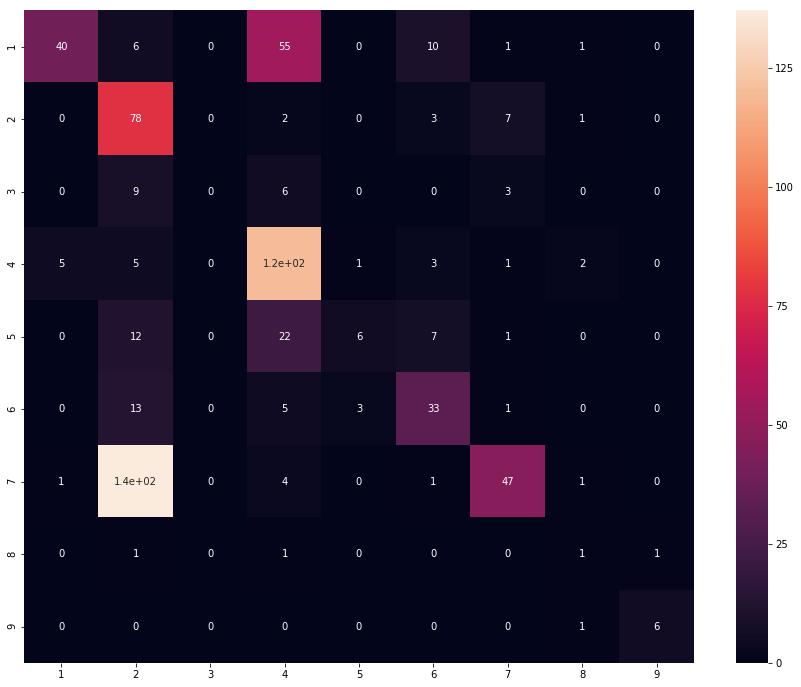

*********************************** Precision Matrix ***********************************


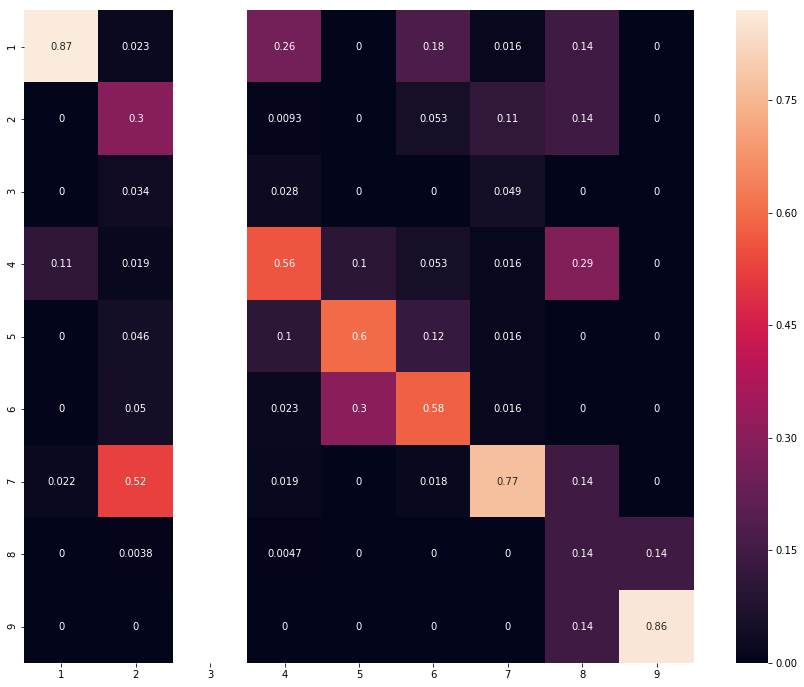

*********************************** Recall Matrix ***********************************


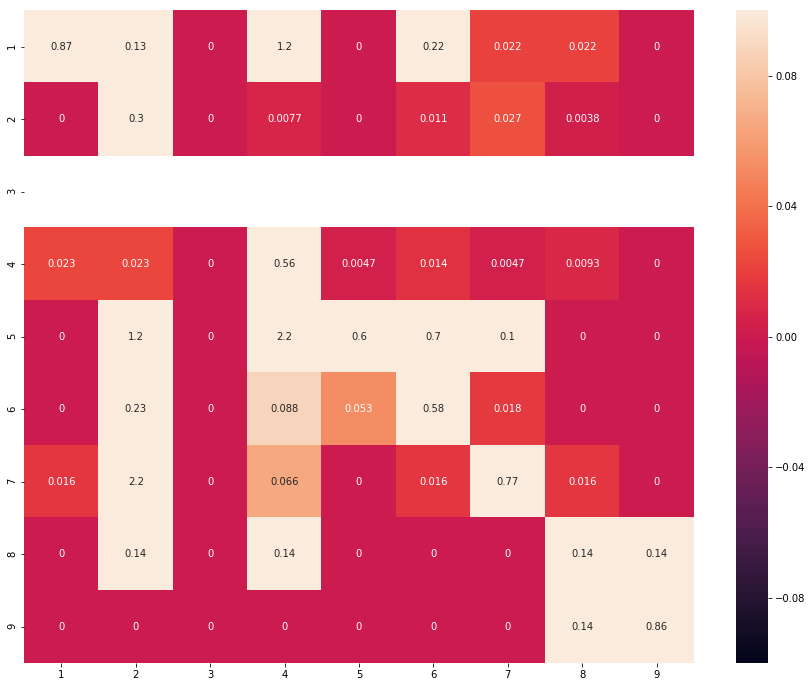

In [184]:
predict_and_plot_confusion_matrix(x_train_rc, ytrain, x_test_rc, ytest, 
                                  RandomForestClassifier(n_estimators= 200, max_depth= 8, random_state=42, n_jobs=-1, 
                                                         class_weight= 'balanced'))

<h3>4.5.5. Feature Importance</h3>

<h4>4.5.5.1. Correctly Classified point</h4>

In [188]:
test_point_index = 1
no_feature = 500
predicted_cls = cccv.predict(x_test_rc[test_point_index].reshape(1,-1))
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(cccv.predict_proba(x_test_rc[test_point_index].reshape(1,-1)),4))
print("Actual Class :", ytest[test_point_index])
indices = np.argsort(-rfc.feature_importances_)
print("-"*50)
for i in indices:
    if i<9:
        print("Gene is important feature")
    elif i<18:
        print("Variation is important feature")
    else:
        print("Text is important feature")

Predicted Class : 1
Predicted Class Probabilities: [[0.9536 0.0022 0.0013 0.0325 0.0013 0.0035 0.002  0.0018 0.0019]]
Actual Class : 1
--------------------------------------------------
Variation is important feature
Variation is important feature
Variation is important feature
Variation is important feature
Variation is important feature
Variation is important feature
Variation is important feature
Variation is important feature
Variation is important feature
Text is important feature
Text is important feature
Gene is important feature
Text is important feature
Text is important feature
Gene is important feature
Text is important feature
Text is important feature
Gene is important feature
Gene is important feature
Text is important feature
Text is important feature
Text is important feature
Gene is important feature
Gene is important feature
Gene is important feature
Gene is important feature
Gene is important feature


<h4>4.5.3.2. Inorrectly Classified point</h4>

In [191]:
test_point_index = 4
no_feature = 500
predicted_cls = cccv.predict(x_test_rc[test_point_index].reshape(1,-1))
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(cccv.predict_proba(x_test_rc[test_point_index].reshape(1,-1)),4))
print("Actual Class :", ytest[test_point_index])
indices = np.argsort(-rfc.feature_importances_)
print("-"*50)
for i in indices:
    if i<9:
        print("Gene is important feature")
    elif i<18:
        print("Variation is important feature")
    else:
        print("Text is important feature")

Predicted Class : 2
Predicted Class Probabilities: [[0.0449 0.3946 0.0231 0.0912 0.041  0.0786 0.1985 0.1062 0.0218]]
Actual Class : 7
--------------------------------------------------
Variation is important feature
Variation is important feature
Variation is important feature
Variation is important feature
Variation is important feature
Variation is important feature
Variation is important feature
Variation is important feature
Variation is important feature
Text is important feature
Text is important feature
Gene is important feature
Text is important feature
Text is important feature
Gene is important feature
Text is important feature
Text is important feature
Gene is important feature
Gene is important feature
Text is important feature
Text is important feature
Text is important feature
Gene is important feature
Gene is important feature
Gene is important feature
Gene is important feature
Gene is important feature


<h2>4.7 Stack the models </h2>

<h3>4.7.1 testing with hyper parameter tuning</h3>

In [194]:
# read more about SGDClassifier() at 
# http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/geometric-intuition-1/
#------------------------------


# read more about support vector machines with linear kernals here 
# http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
# --------------------------------
# default parameters 
# SVC(C=1.0, kernel=’rbf’, degree=3, gamma=’auto’, coef0=0.0, shrinking=True, probability=False, tol=0.001, 
# cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape=’ovr’, random_state=None)

# Some of methods of SVM()
# fit(X, y, [sample_weight])	Fit the SVM model according to the given training data.
# predict(X)	Perform classification on samples in X.


# read more about support vector machines with linear kernals here 
# http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
# --------------------------------
# default parameters 
# sklearn.ensemble.RandomForestClassifier(n_estimators=10, criterion=’gini’, max_depth=None, min_samples_split=2, 
# min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=’auto’, max_leaf_nodes=None, min_impurity_decrease=0.0, 
# min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, warm_start=False, 
# class_weight=None)

# Some of methods of RandomForestClassifier()
# fit(X, y, [sample_weight])	Fit the SVM model according to the given training data.
# predict(X)	Perform classification on samples in X.
# predict_proba (X)	Perform classification on samples in X.

# some of attributes of  RandomForestClassifier()
# feature_importances_ : array of shape = [n_features]
# The feature importances (the higher, the more important the feature).


# Logistic Regression
clf1= SGDClassifier(alpha= 0.0001, penalty= 'l2', loss= 'log', class_weight= 'balanced', random_state= 0)
clf1.fit(x_train_ohe, ytrain)
sig_clf1= CalibratedClassifierCV(clf1, method= "sigmoid")

# Linear Support Vector Machine
clf2= SGDClassifier(alpha= 0.0001, penalty= 'l2', loss= 'hinge', class_weight= 'balanced', random_state= 0)
clf2.fit(x_train_ohe, ytrain)
sig_clf2= CalibratedClassifierCV(clf2, method= "sigmoid")

# Multinomial Naive Bayes
clf3= MultinomialNB(alpha= 0.00001)
clf3.fit(x_train_ohe, ytrain)
sig_clf3= CalibratedClassifierCV(clf3, method= "sigmoid")

sig_clf1.fit(x_train_ohe, ytrain)
print("Logistic Regression :  Log Loss: %0.2f" % (log_loss(ycv, sig_clf1.predict_proba(x_cv_ohe))))
sig_clf2.fit(x_train_ohe, ytrain)
print("Support vector machines : Log Loss: %0.2f" % (log_loss(ycv, sig_clf2.predict_proba(x_cv_ohe))))
sig_clf3.fit(x_train_ohe, ytrain)
print("Naive Bayes : Log Loss: %0.2f" % (log_loss(ycv, sig_clf3.predict_proba(x_cv_ohe))))
print("-"*50)

alpha= [0.0001,0.001,0.01,0.1,1,10] 
best_alpha= 999
for i in alpha:
    # Logistic Regression
    lr= LogisticRegression(C=i)
    sclf= StackingClassifier(classifiers= [sig_clf1, sig_clf2, sig_clf3], meta_classifier= lr, use_probas= True)
    sclf.fit(x_train_ohe, ytrain)
    print("Stacking Classifer : for the value of alpha: %f Log Loss: %0.3f" % (i, log_loss(ycv, sclf.predict_proba(x_cv_ohe))))
    log_error =log_loss(ycv, sclf.predict_proba(x_cv_ohe))
    if best_alpha > log_error:
        best_alpha = log_error

Logistic Regression :  Log Loss: 1.05
Support vector machines : Log Loss: 1.06
Naive Bayes : Log Loss: 1.30
--------------------------------------------------
Stacking Classifer : for the value of alpha: 0.000100 Log Loss: 2.172
Stacking Classifer : for the value of alpha: 0.001000 Log Loss: 1.979
Stacking Classifer : for the value of alpha: 0.010000 Log Loss: 1.368
Stacking Classifer : for the value of alpha: 0.100000 Log Loss: 1.108
Stacking Classifer : for the value of alpha: 1.000000 Log Loss: 1.370
Stacking Classifer : for the value of alpha: 10.000000 Log Loss: 1.930


In [202]:
# Confusion Matrix for Stacking Classifier

def predict_and_plot_confusion_matrix_sc(x_train_ohe, ytrain, x_test_ohe, ytest, clf):
    clf.fit(x_train_ohe, ytrain)
    y_pred = clf.predict(x_test_ohe)

    # for calculating log_loss we willl provide the array of probabilities belongs to each class
    print("Log loss :",log_loss(ytest, clf.predict_proba(x_test_ohe)))
    # calculating the number of data points that are misclassified
    print("Number of mis-classified points :", np.count_nonzero((y_pred - ytest))/ytest.shape[0])
    print()
    print('*'*35 +' Confusion Matrix ' + '*'*35)
    c_m = confusion_matrix(ytest, y_pred)
    heatmap(c_m)
    # Precision
    print('*'*35 +' Precision Matrix ' + '*'*35)
    precision = c_m / c_m.sum(axis=0)
    heatmap(precision)
    # Recall
    print('*'*35 +' Recall Matrix ' + '*'*35)
    recall = (c_m.T / c_m.sum(axis=0)).T
    heatmap(recall)

Log loss (train) on the stacking classifier : 0.3453982162708228
Log loss (CV) on the stacking classifier : 1.1084209013583475
Log loss (test) on the stacking classifier : 1.072860528855775
Log loss : 1.072860528855775
Number of mis-classified points : 0.34036144578313254

*********************************** Confusion Matrix ***********************************


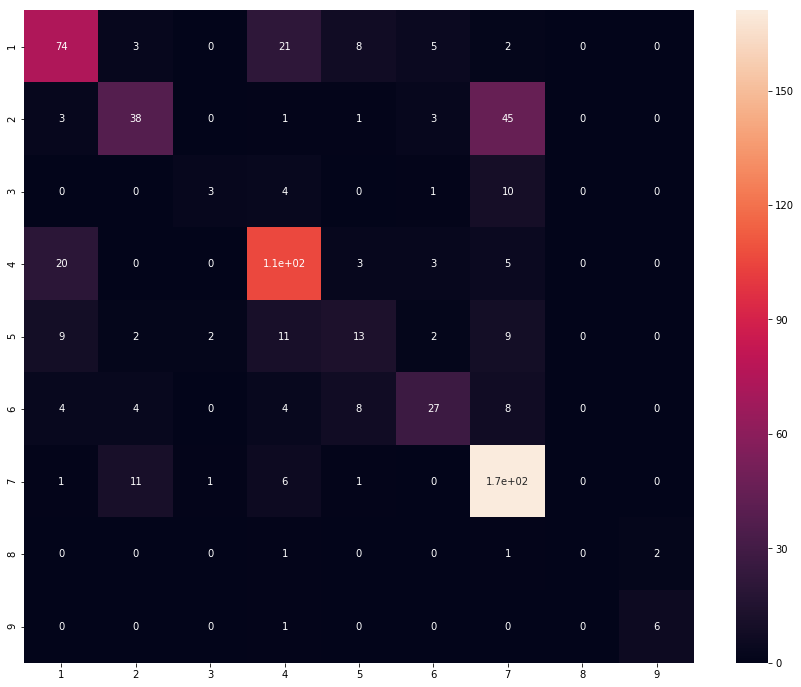

*********************************** Precision Matrix ***********************************


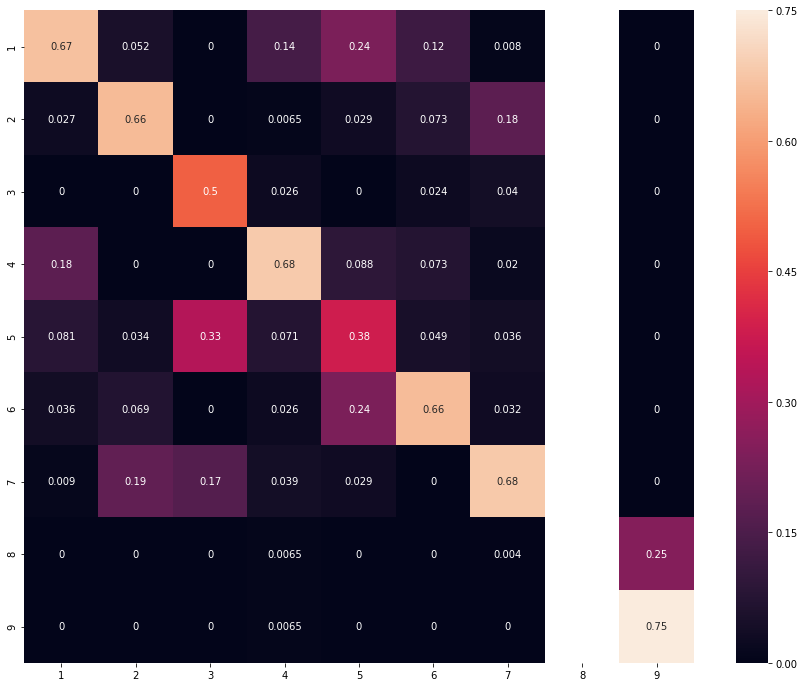

*********************************** Recall Matrix ***********************************


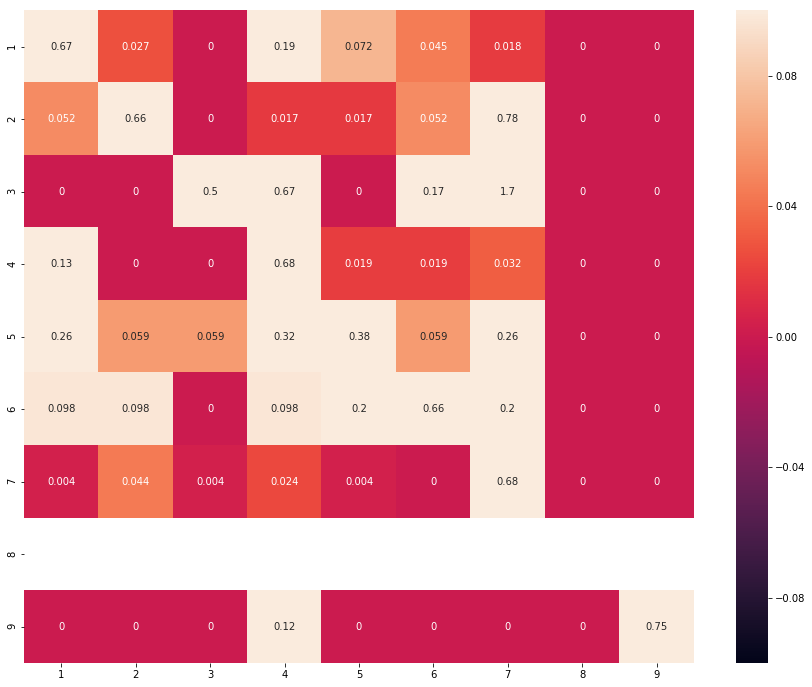

In [203]:
lr = LogisticRegression(C=0.1)
sclf = StackingClassifier(classifiers=[sig_clf1, sig_clf2, sig_clf3], meta_classifier=lr, use_probas=True)
sclf.fit(x_train_ohe, ytrain)

log_error = log_loss(ytrain, sclf.predict_proba(x_train_ohe))
print("Log loss (train) on the stacking classifier :",log_error)

log_error = log_loss(ycv, sclf.predict_proba(x_cv_ohe))
print("Log loss (CV) on the stacking classifier :",log_error)

log_error = log_loss(ytest, sclf.predict_proba(x_test_ohe))
print("Log loss (test) on the stacking classifier :",log_error)

predict_and_plot_confusion_matrix_sc(x_train_ohe, ytrain, x_test_ohe, ytest, StackingClassifier(classifiers= [sig_clf1, sig_clf2, sig_clf3],
                                                                                           meta_classifier=lr, use_probas=True))

<h3>4.7.3 Maximum Voting classifier </h3>

In [204]:
#Refer:http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html
from sklearn.ensemble import VotingClassifier

clf1= SGDClassifier(loss= 'log', penalty= 'l2', alpha= 0.0001, random_state= 42, class_weight= 'balanced')
clf1.fit(x_train_ohe, ytrain)
sig_clf1 = CalibratedClassifierCV(clf1, method= "sigmoid")

clf2= SGDClassifier(loss= 'hinge', penalty= 'l2', alpha= 0.0001, random_state= 42, class_weight= 'balanced')
clf2.fit(x_train_ohe, ytrain)
sig_clf2 = CalibratedClassifierCV(clf2, method= "sigmoid")

clf3= RandomForestClassifier(n_estimators= 1000, max_depth= 8, random_state=42, n_jobs=-1, 
                                                         class_weight= 'balanced')
clf3.fit(x_train_ohe, ytrain)
sig_clf3 = CalibratedClassifierCV(clf3, method= "sigmoid")

vclf = VotingClassifier(estimators=[('lr', sig_clf1), ('svc', sig_clf2), ('rf', sig_clf3)], voting='soft')
vclf.fit(x_train_ohe, ytrain)
print("Log loss (train) on the VotingClassifier :", log_loss(ytrain, vclf.predict_proba(x_train_ohe)))
print("Log loss (CV) on the VotingClassifier :", log_loss(ycv, vclf.predict_proba(x_cv_ohe)))
print("Log loss (test) on the VotingClassifier :", log_loss(ytest, vclf.predict_proba(x_test_ohe)))


Log loss (train) on the VotingClassifier : 0.48588942816525466
Log loss (CV) on the VotingClassifier : 1.0105732613596352
Log loss (test) on the VotingClassifier : 0.971637810694532


Log loss : 0.971637810694532
Number of mis-classified points : 0.32831325301204817

*********************************** Confusion Matrix ***********************************


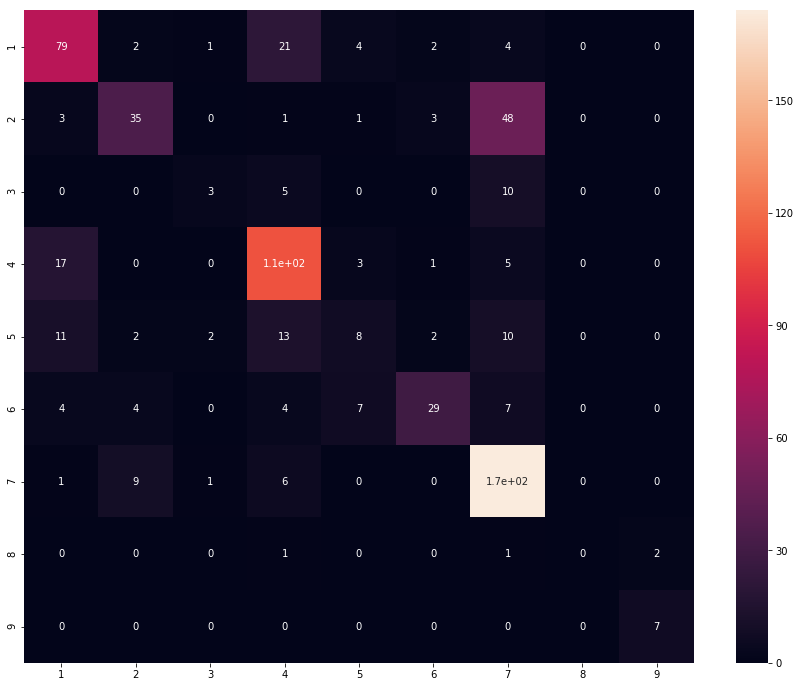

*********************************** Precision Matrix ***********************************


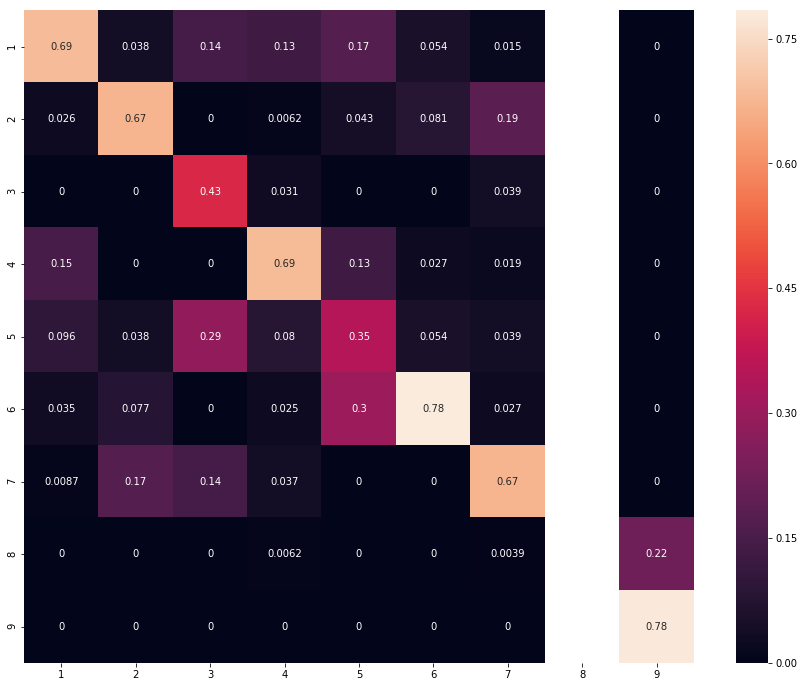

*********************************** Recall Matrix ***********************************


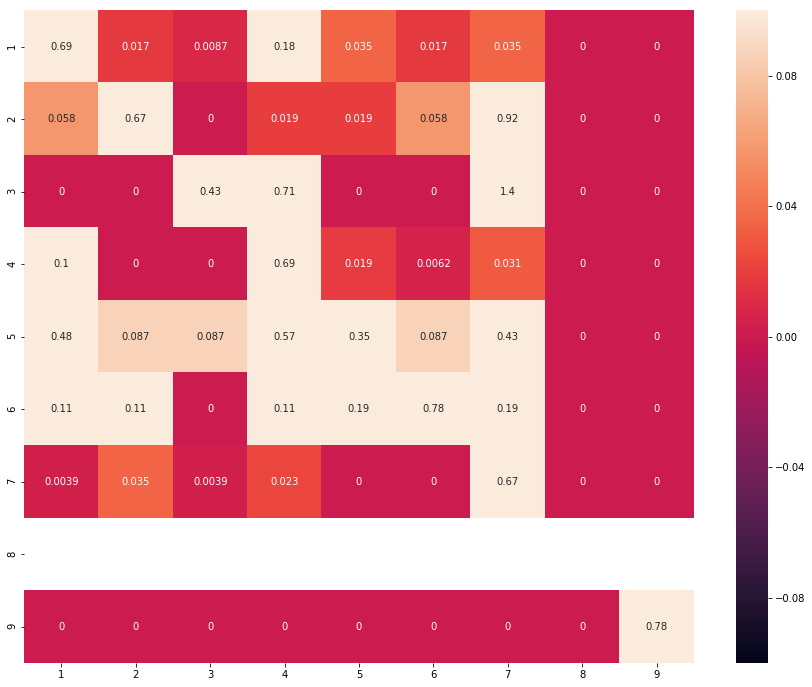

In [205]:
predict_and_plot_confusion_matrix_sc(x_train_ohe, ytrain, x_test_ohe, ytest, vclf)

# Conclusions

In [213]:
print("Below are the detailed conclusions about various Classifiers\n")
x = PrettyTable()

x.field_names = ["Rank", "Classifier", "Train", "CV", "Test", "MisClassified %", "Hyperparameters", "Comments"]
x.add_row([1, "Logistic Regression", 0.42, 1.05, 0.96, 0.32, "Alpha= 0.0001", "B, I, OHE"])
x.add_row([2, "Logistic Regression", 0.42, 1.09, 0.99, 0.33, "Alpha= 0.0001", "IB, I, OHE"])
x.add_row([3, "Voting Classifier", 0.49, 1.01, 0.97 , 0.33, "LR, Linear SVM, RF", "B, NI, OHE"])
x.add_row([4, "Linear SVM", 0.42, 1.06, 1.00, 0.33, "Alpha= 0.0001", "B, I, OHE"])
x.add_row([5, "Stacking Classifier", 0.34, 1.10, 1.07, 0.34, "LR, Linear SVM, MNB", "IB, NI, OHE"])
x.add_row([6, "K Nearest Neighbors", 0.84, 1.13, 1.08, 0.38, "K= 41", "IB, NI, RC"])
x.add_row([7, "Random Forest", 0.68, 1.23, 1.16, 0.38, "E= 1000, Max-Depth= 8", "B, I, OHE"])
x.add_row([8, "Multinomial Naive Bayes", 0.66, 1.30, 1.21, 0.38, "Alpha= 0.00001", "IB, I, OHE"])
x.add_row([9, "Random Forest", 0.03, 1.30, 1.28, 0.50, "E= 200, Max-Depth= 8", "B, NI, RC"])

print(x)
print()
print('B - Balanced')
print('E - Estimator')
print('IB - Imbalanced')
print('OHE - OneHotEncoding')
print('RC - Response Coding')
print('NI - Not Interpretable')
print('LR - Logistic Regression')
print('RF - Random Forest')
print('MNB - Multinomial Naive Bayes')


Below are the detailed conclusions about various Classifiers

+------+-------------------------+-------+------+------+-----------------+-----------------------+-------------+
| Rank |        Classifier       | Train |  CV  | Test | MisClassified % |    Hyperparameters    |   Comments  |
+------+-------------------------+-------+------+------+-----------------+-----------------------+-------------+
|  1   |   Logistic Regression   |  0.42 | 1.05 | 0.96 |       0.32      |     Alpha= 0.0001     |  B, I, OHE  |
|  2   |   Logistic Regression   |  0.42 | 1.09 | 0.99 |       0.33      |     Alpha= 0.0001     |  IB, I, OHE |
|  3   |    Voting Classifier    |  0.49 | 1.01 | 0.97 |       0.33      |   LR, Linear SVM, RF  |  B, NI, OHE |
|  4   |        Linear SVM       |  0.42 | 1.06 | 1.0  |       0.33      |     Alpha= 0.0001     |  B, I, OHE  |
|  5   |   Stacking Classifier   |  0.34 | 1.1  | 1.07 |       0.34      |  LR, Linear SVM, MNB  | IB, NI, OHE |
|  6   |   K Nearest Neighbors   |